# InertialVibrationAnalysis

## 1 Description
This project is using for collect data from the ps5 controller and analyze the data to identify the status of the controller.
By using the inear resonant actuator with something certain signal and the inertial sensor to identify the status of the controller.

### 1.1 Data description


In [25]:
# read the csv file 
import pandas as pd

file_name="inertial_data_rule1.csv"
data=pd.read_csv(file_name)

# data description
data.head()

time  acc_x  acc_y  acc_z  gyro_pitch  gyro_yaw  \
0  2025-01-08 14:00:17.122636      5      3      9       -2540      7730   
1  2025-01-08 14:00:17.123878      5      3      9       -2540      7730   
2  2025-01-08 14:00:17.125141      3      2      6       -2543      7757   
3  2025-01-08 14:00:17.126386      3      2      6       -2543      7757   
4  2025-01-08 14:00:17.127642      3      2      6       -2543      7757   

   gyro_roll  vibration_status  label  person_id  
0       1259                 0      0          0  
1       1259                 0      0          0  
2       1242                 0      0          0  
3       1242                 0      0          0  
4       1242                 0      0          0

| **Field**           | **Description**                                                                  |
|----------------------|----------------------------------------------------------------------------------|
| `time`              | Timestamp of the data reading. YYYY-MM-DD HH:MM:SS.SSSSSS                                               |
| `acc_x`             | Acceleration along the X-axis -32768 to 32767.                                           |
| `acc_y`             | Acceleration along the Y-axis -32768 to 32767.                                           |
| `acc_z`             | Acceleration along the Z-axis -32768 to 32767.                                           |
| `gyro_pitch`        | Gyroscope reading for pitch -32768 to 32767.               |
| `gyro_yaw`          | Gyroscope reading for yaw -32768 to 32767.                 |
| `gyro_roll`         | Gyroscope reading for roll -32768 to 32767.                |
| `vibration_status`  | Indicates the vibration pattern:                                                |
|                      | - `0`: No vibration                                                            |
|                      | - `1`: Vibration type 1, half intensity, 128 intensity                                                        |
|                      | - `2`: Vibration type 2, full intensity, 255 intensity   (not used)                                                     |
|                      | - `3`: Vibration type 3, 1hz sin wave, 0 to 255 intensity   (not used)                                                     |
|                      | - `4`: Vibration type 4, low intensity, 10 intensity                                                        |
|                      | - `8`: Vibration type 8, minimum intensity, 1 intensity      (for the person identification, )                                                  |
| `label`             | Label indicating the status:                                                   |
|                      | - `0`: On table                                                               |
|                      | - `1`: In hand                                                               |
| `person_id`         | Identifier for the person providing the data:                                   |
|                      | - `0`: Person 1                                                              |
|                      | - `1`: Person 2                                                              |
|                      | - `2`: Person 3                                                              |
|                      | - `3`: Person 4                                                              |


### 1.2 Data collection rule


| **Parameter**        | **Description**                                                                                       |
|-----------------------|-------------------------------------------------------------------------------------------------------|
| `rule_name`          | **rule1**: The name of the rule.                                                                      |
| `category_rows`      | **1000 rows** per vibration status and label:                                                        |
|                      | - Data collection includes **1000 rows** for each combination of vibration pattern and label.        |
|                      | - Example:                                                                                           |
|                      |   - **On Table**, Pattern 1: 1000 rows                                                               |
|                      |   - **In Hand**, Pattern 1: 1000 rows                                                                |
|                      |   - Repeated for each vibration pattern and label combination.                                       |
| `session_rows`       | **50 rows**: For SVM model, the data is divided into sessions with 50 rows in each category.         |
| `polling_interval`   | **1ms (1000Hz)**: The data polling interval, capturing data every millisecond.                       |
| **Sampling Rate**    | **250Hz**: The actual sampling rate of the controller, limited by the HID API.                       |
|                      | - Even though data is polled at 1000Hz, new sensor readings are available only every 4ms (250Hz).    |
| **Additional Notes** | - The rule ensures sufficient data is collected for each label and vibration pattern.                |
|                      | - Use interpolation or aggregation to align the polled data rate (1000Hz) with the actual sampling rate (250Hz). |


### 1.3 Data analysis and visualization

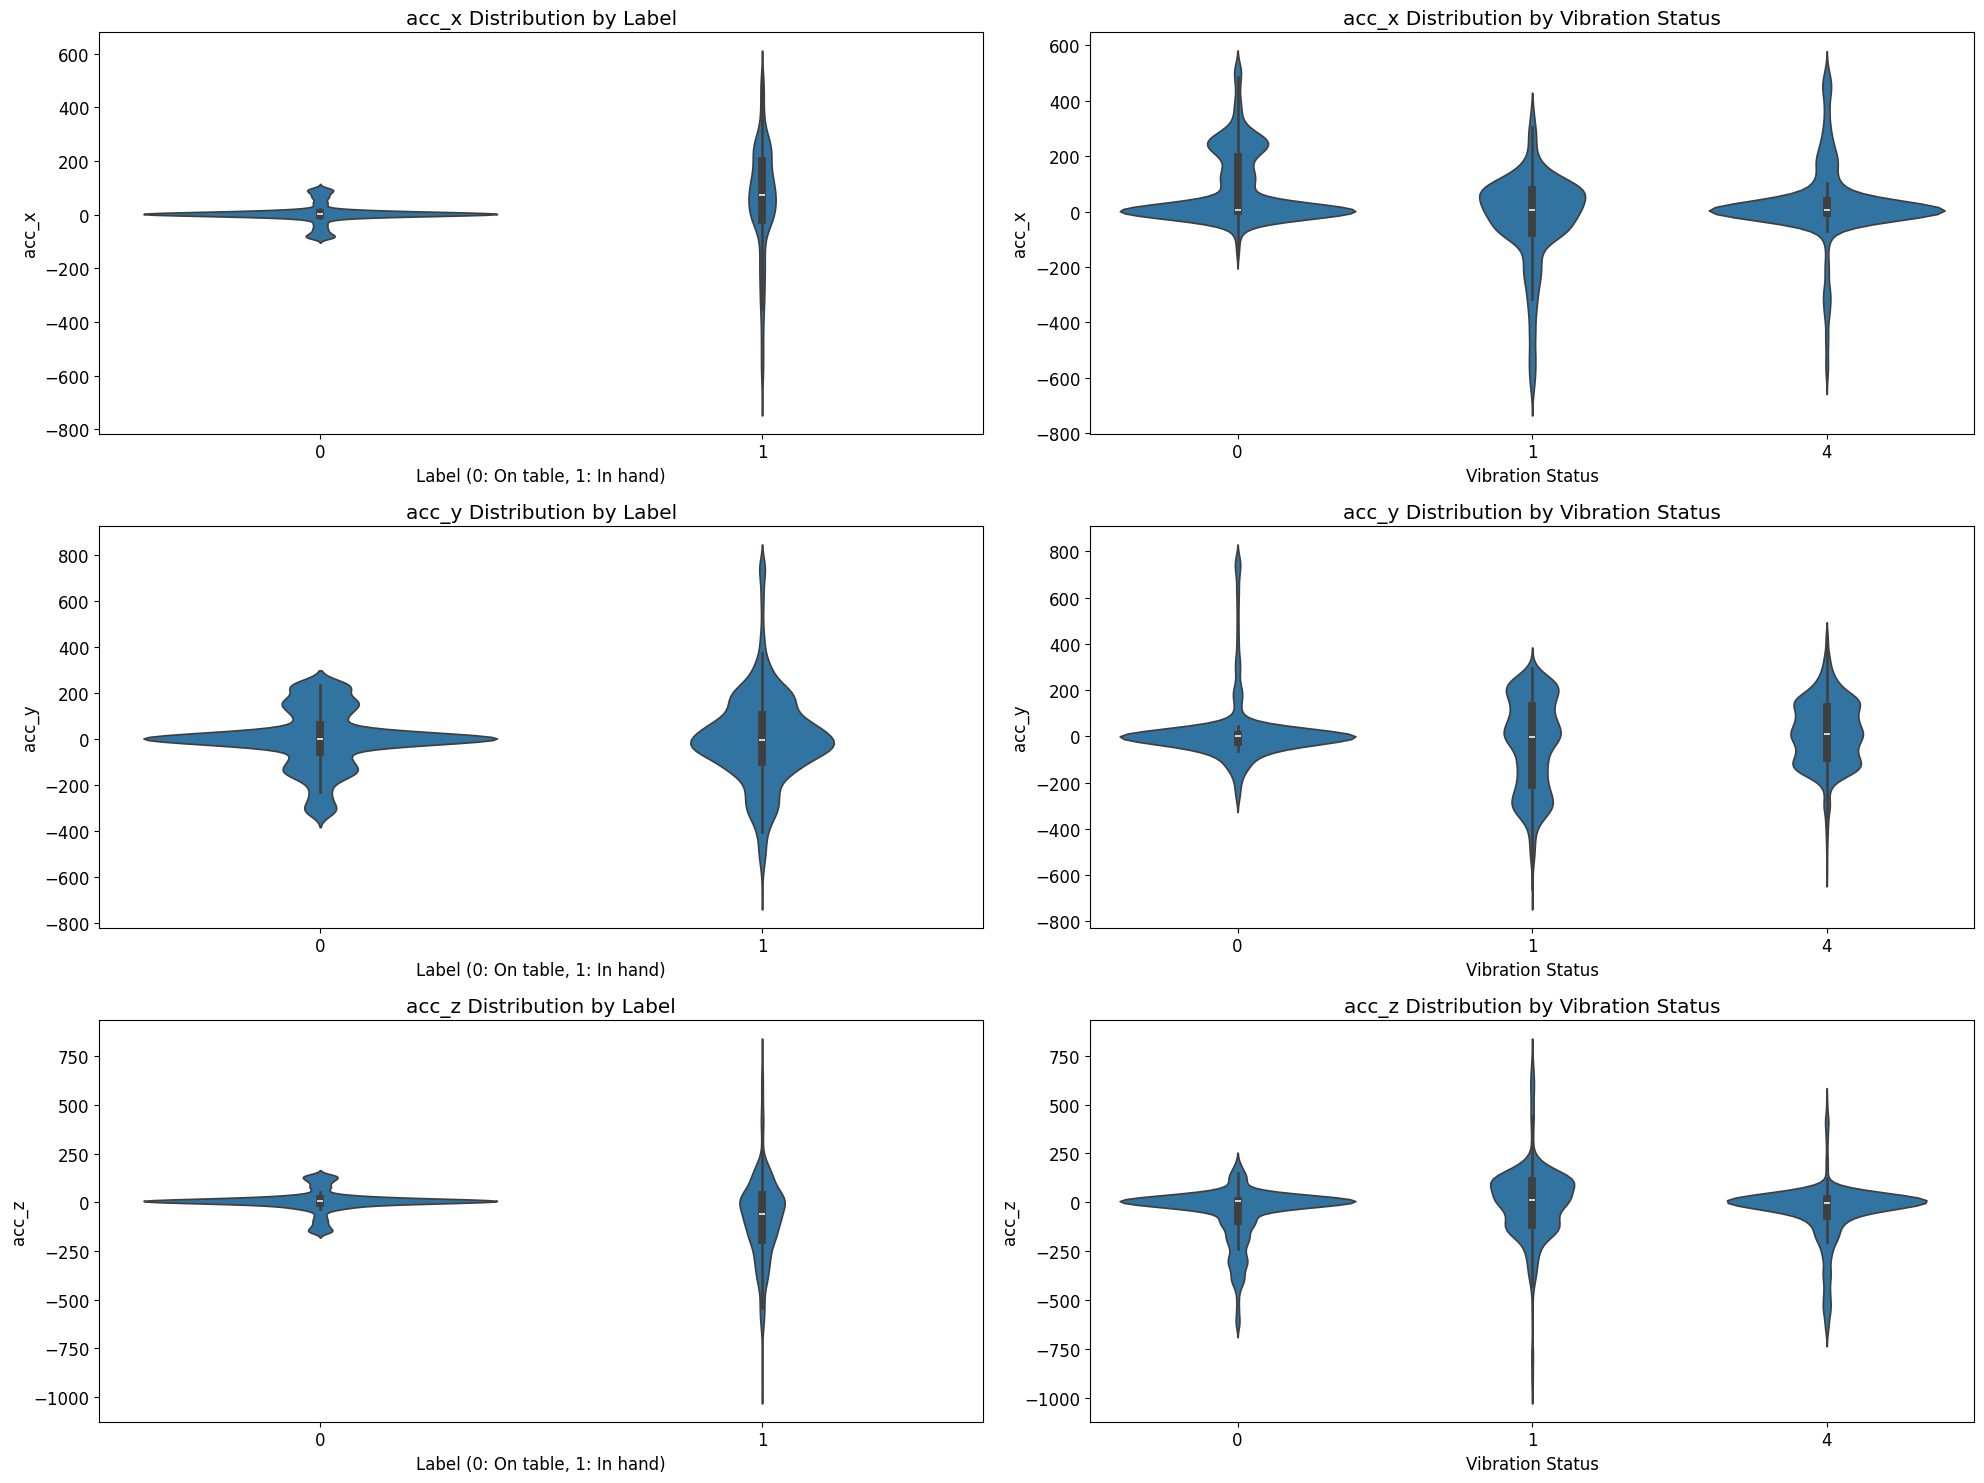

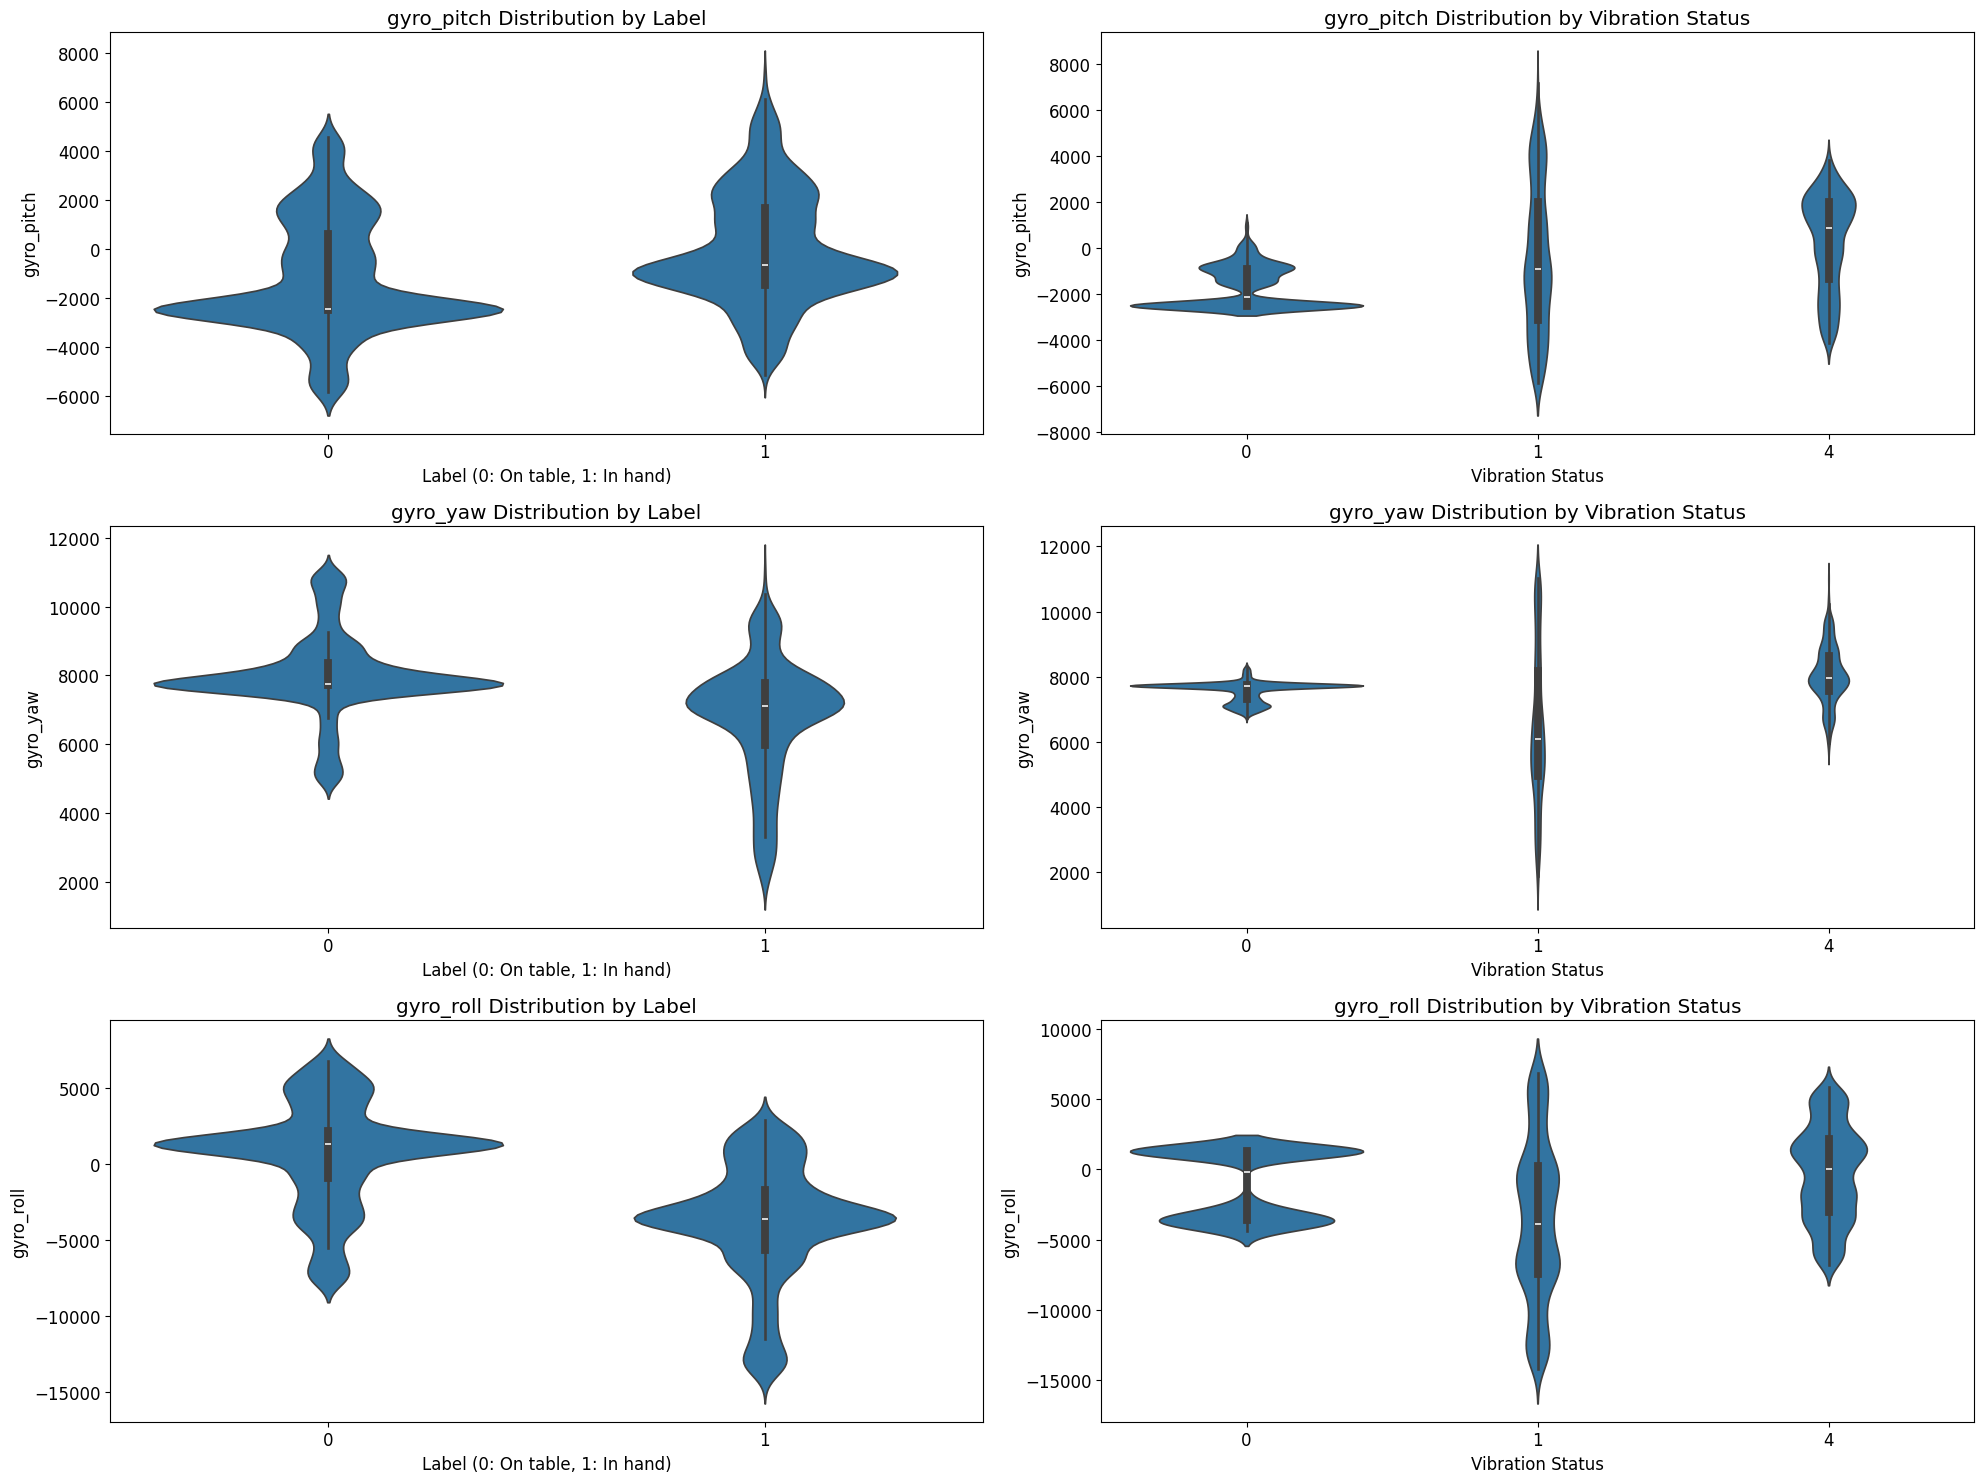


Basic Statistics:

Label Distribution:
label
0    3000
1    3000
Name: count, dtype: int64

Vibration Status Distribution:
vibration_status
0    2000
1    2000
4    2000
Name: count, dtype: int64


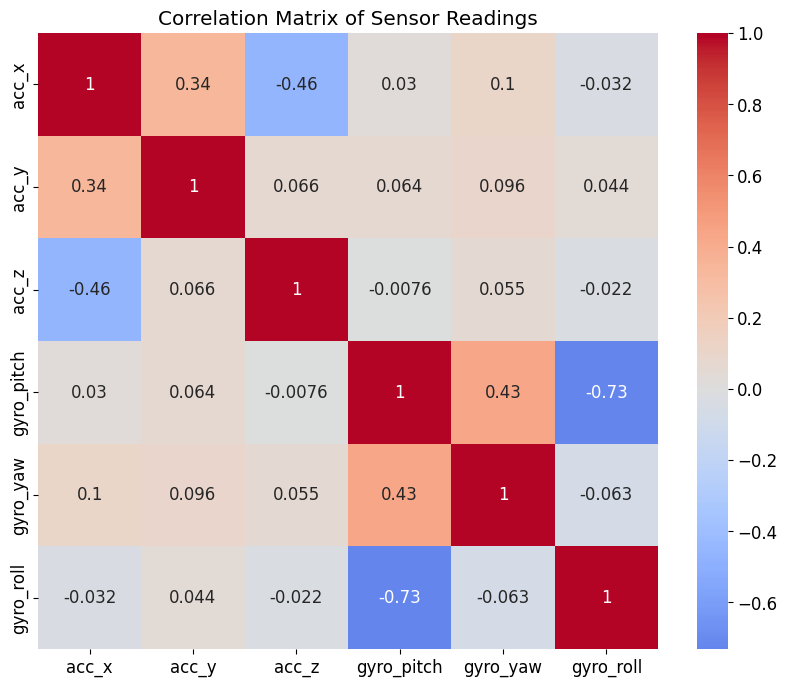

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a built-in style instead of seaborn
plt.style.use('default')

# Set figure size and font size for better readability
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['font.size'] = 12

# Create violin plots for acceleration data vs label and vibration status
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Acceleration data
acc_fields = ['acc_x', 'acc_y', 'acc_z']
for i, field in enumerate(acc_fields):
    # Plot vs label
    plt.subplot(3, 2, i*2+1)
    sns.violinplot(data=data, x='label', y=field)
    plt.title(f'{field} Distribution by Label')
    plt.xlabel('Label (0: On table, 1: In hand)')
    plt.ylabel(field)
    
    # Plot vs vibration status
    plt.subplot(3, 2, i*2+2)
    sns.violinplot(data=data, x='vibration_status', y=field)
    plt.title(f'{field} Distribution by Vibration Status')
    plt.xlabel('Vibration Status')
    plt.ylabel(field)

plt.tight_layout()
plt.show()

# Create violin plots for gyroscope data vs label and vibration status
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Gyroscope data
gyro_fields = ['gyro_pitch', 'gyro_yaw', 'gyro_roll']
for i, field in enumerate(gyro_fields):
    # Plot vs label
    plt.subplot(3, 2, i*2+1)
    sns.violinplot(data=data, x='label', y=field)
    plt.title(f'{field} Distribution by Label')
    plt.xlabel('Label (0: On table, 1: In hand)')
    plt.ylabel(field)
    
    # Plot vs vibration status
    plt.subplot(3, 2, i*2+2)
    sns.violinplot(data=data, x='vibration_status', y=field)
    plt.title(f'{field} Distribution by Vibration Status')
    plt.xlabel('Vibration Status')
    plt.ylabel(field)

plt.tight_layout()
plt.show()

# Print basic statistics
print("\nBasic Statistics:")
print("\nLabel Distribution:")
print(data['label'].value_counts())

print("\nVibration Status Distribution:")
print(data['vibration_status'].value_counts())

# Correlation matrix
sensor_cols = ['acc_x', 'acc_y', 'acc_z', 'gyro_pitch', 'gyro_yaw', 'gyro_roll']
correlation = data[sensor_cols].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Sensor Readings')
plt.show()

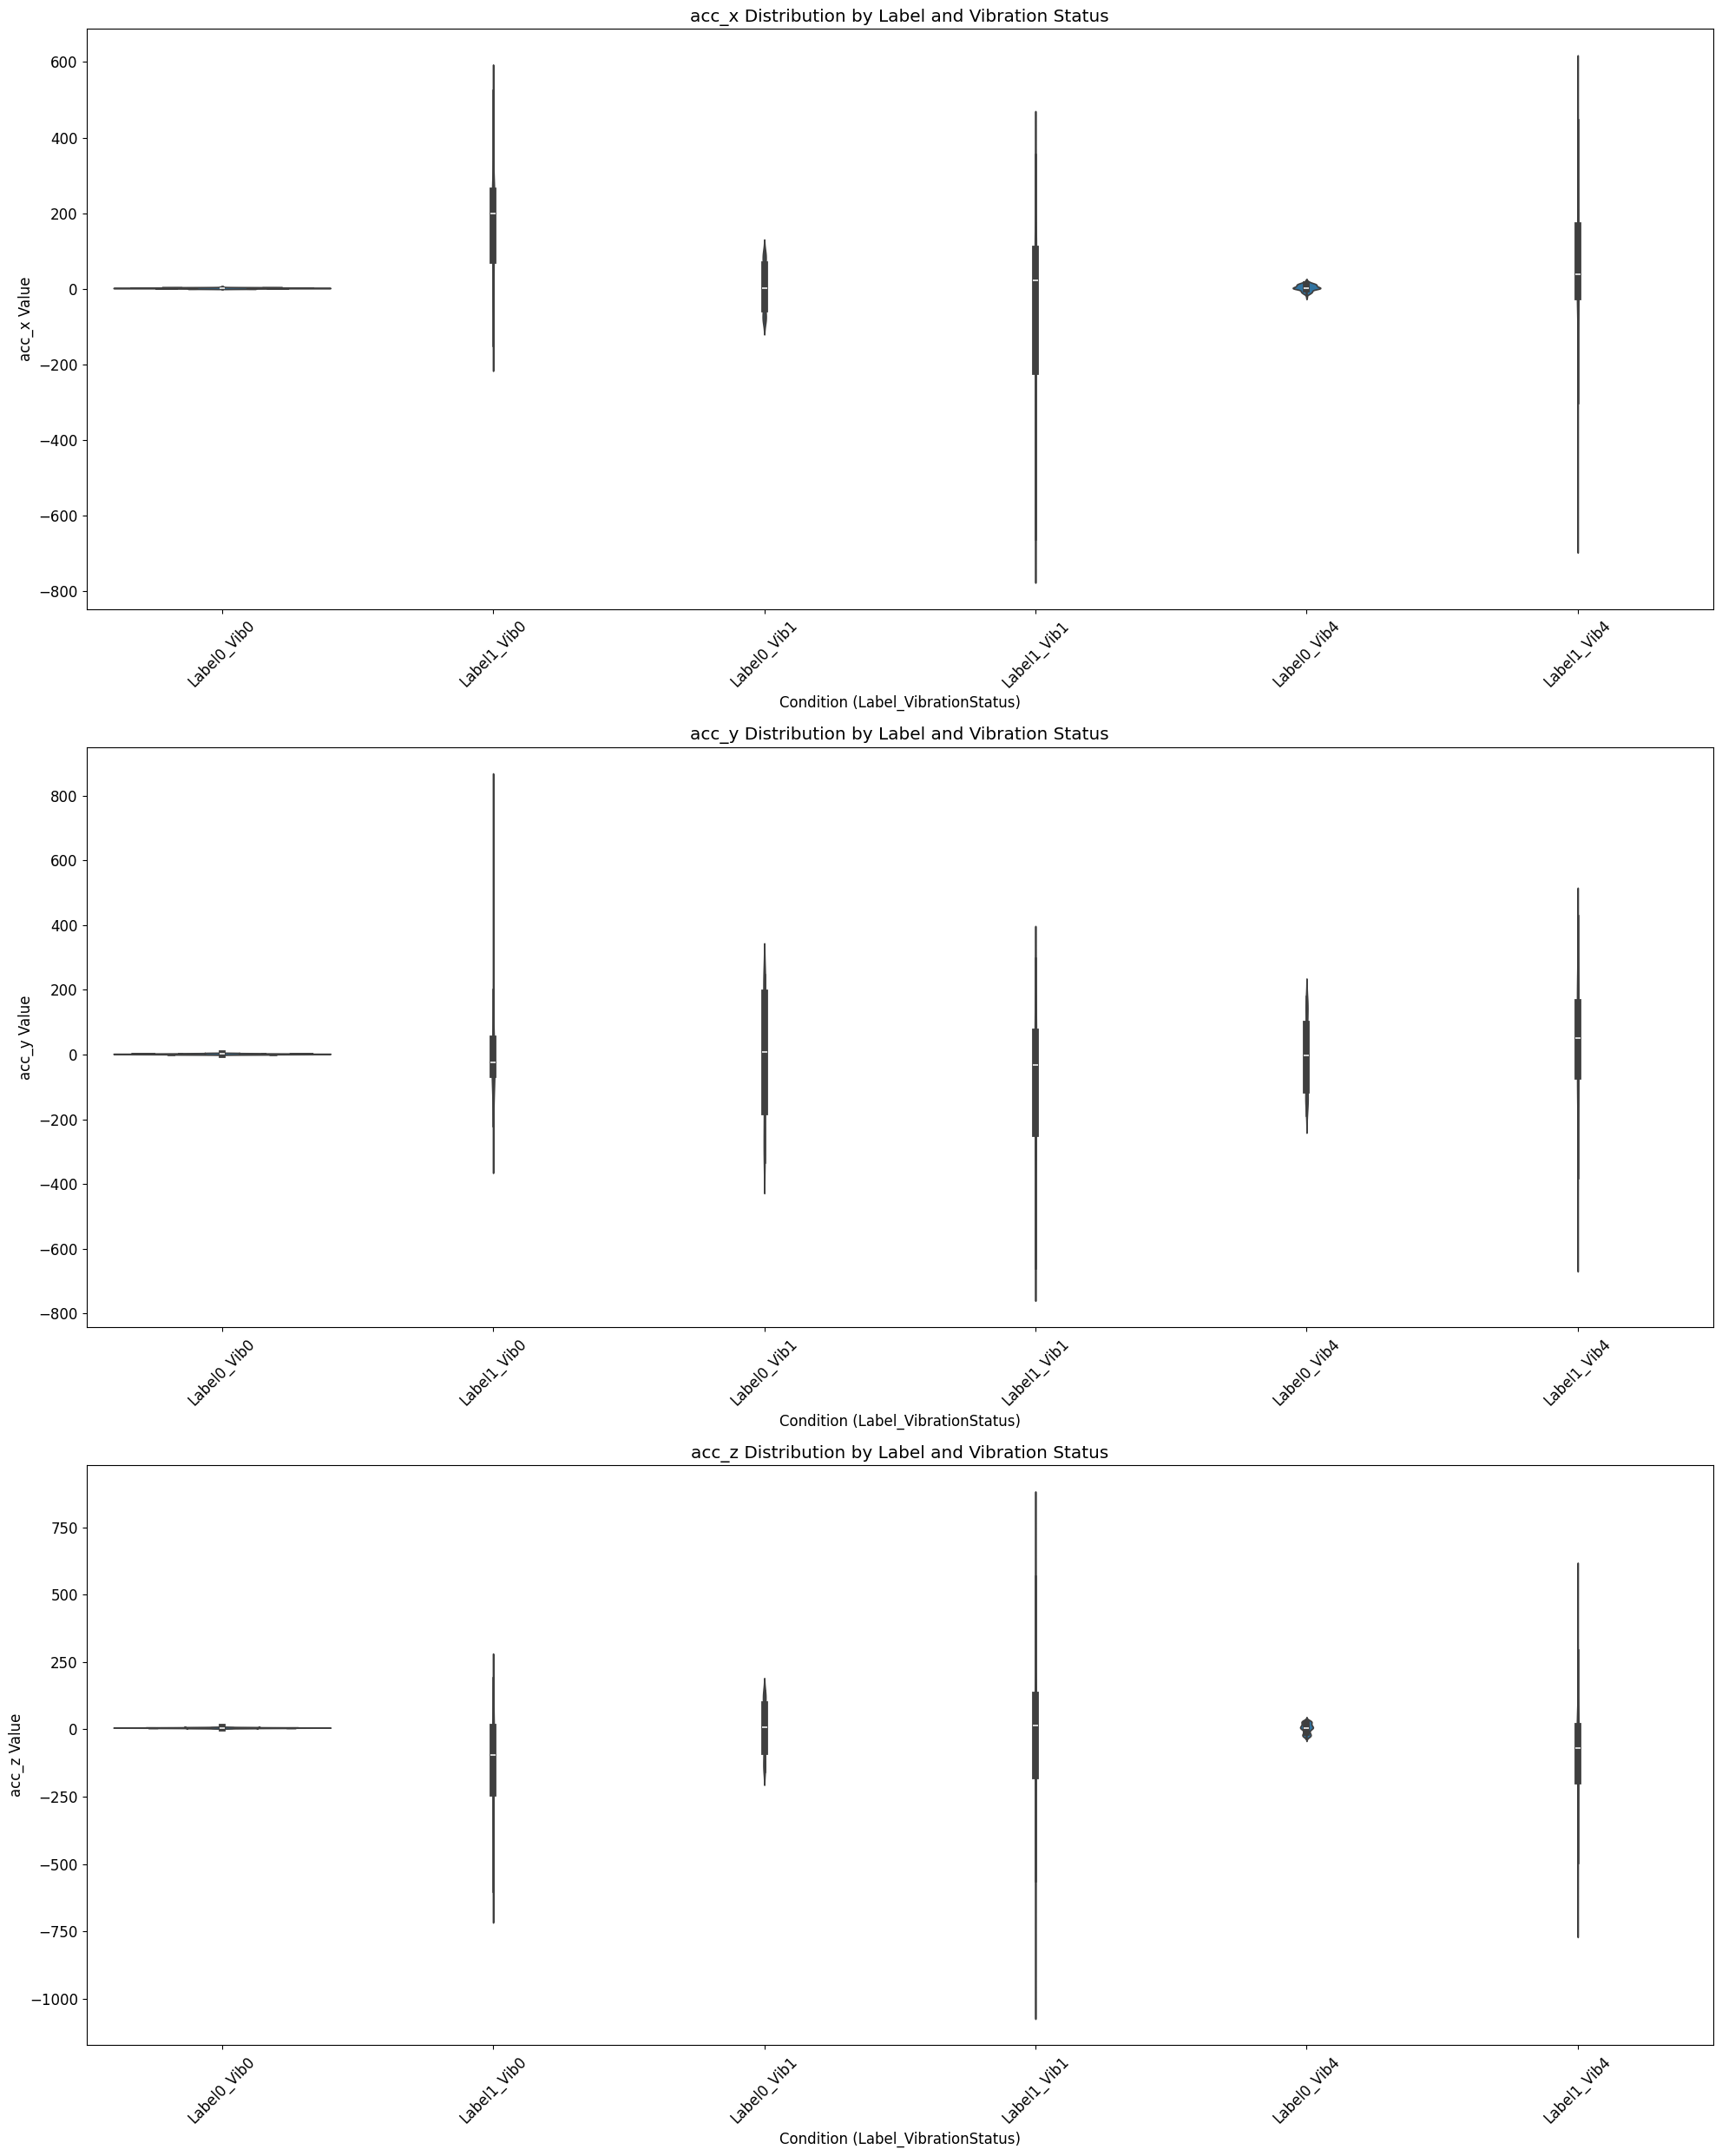

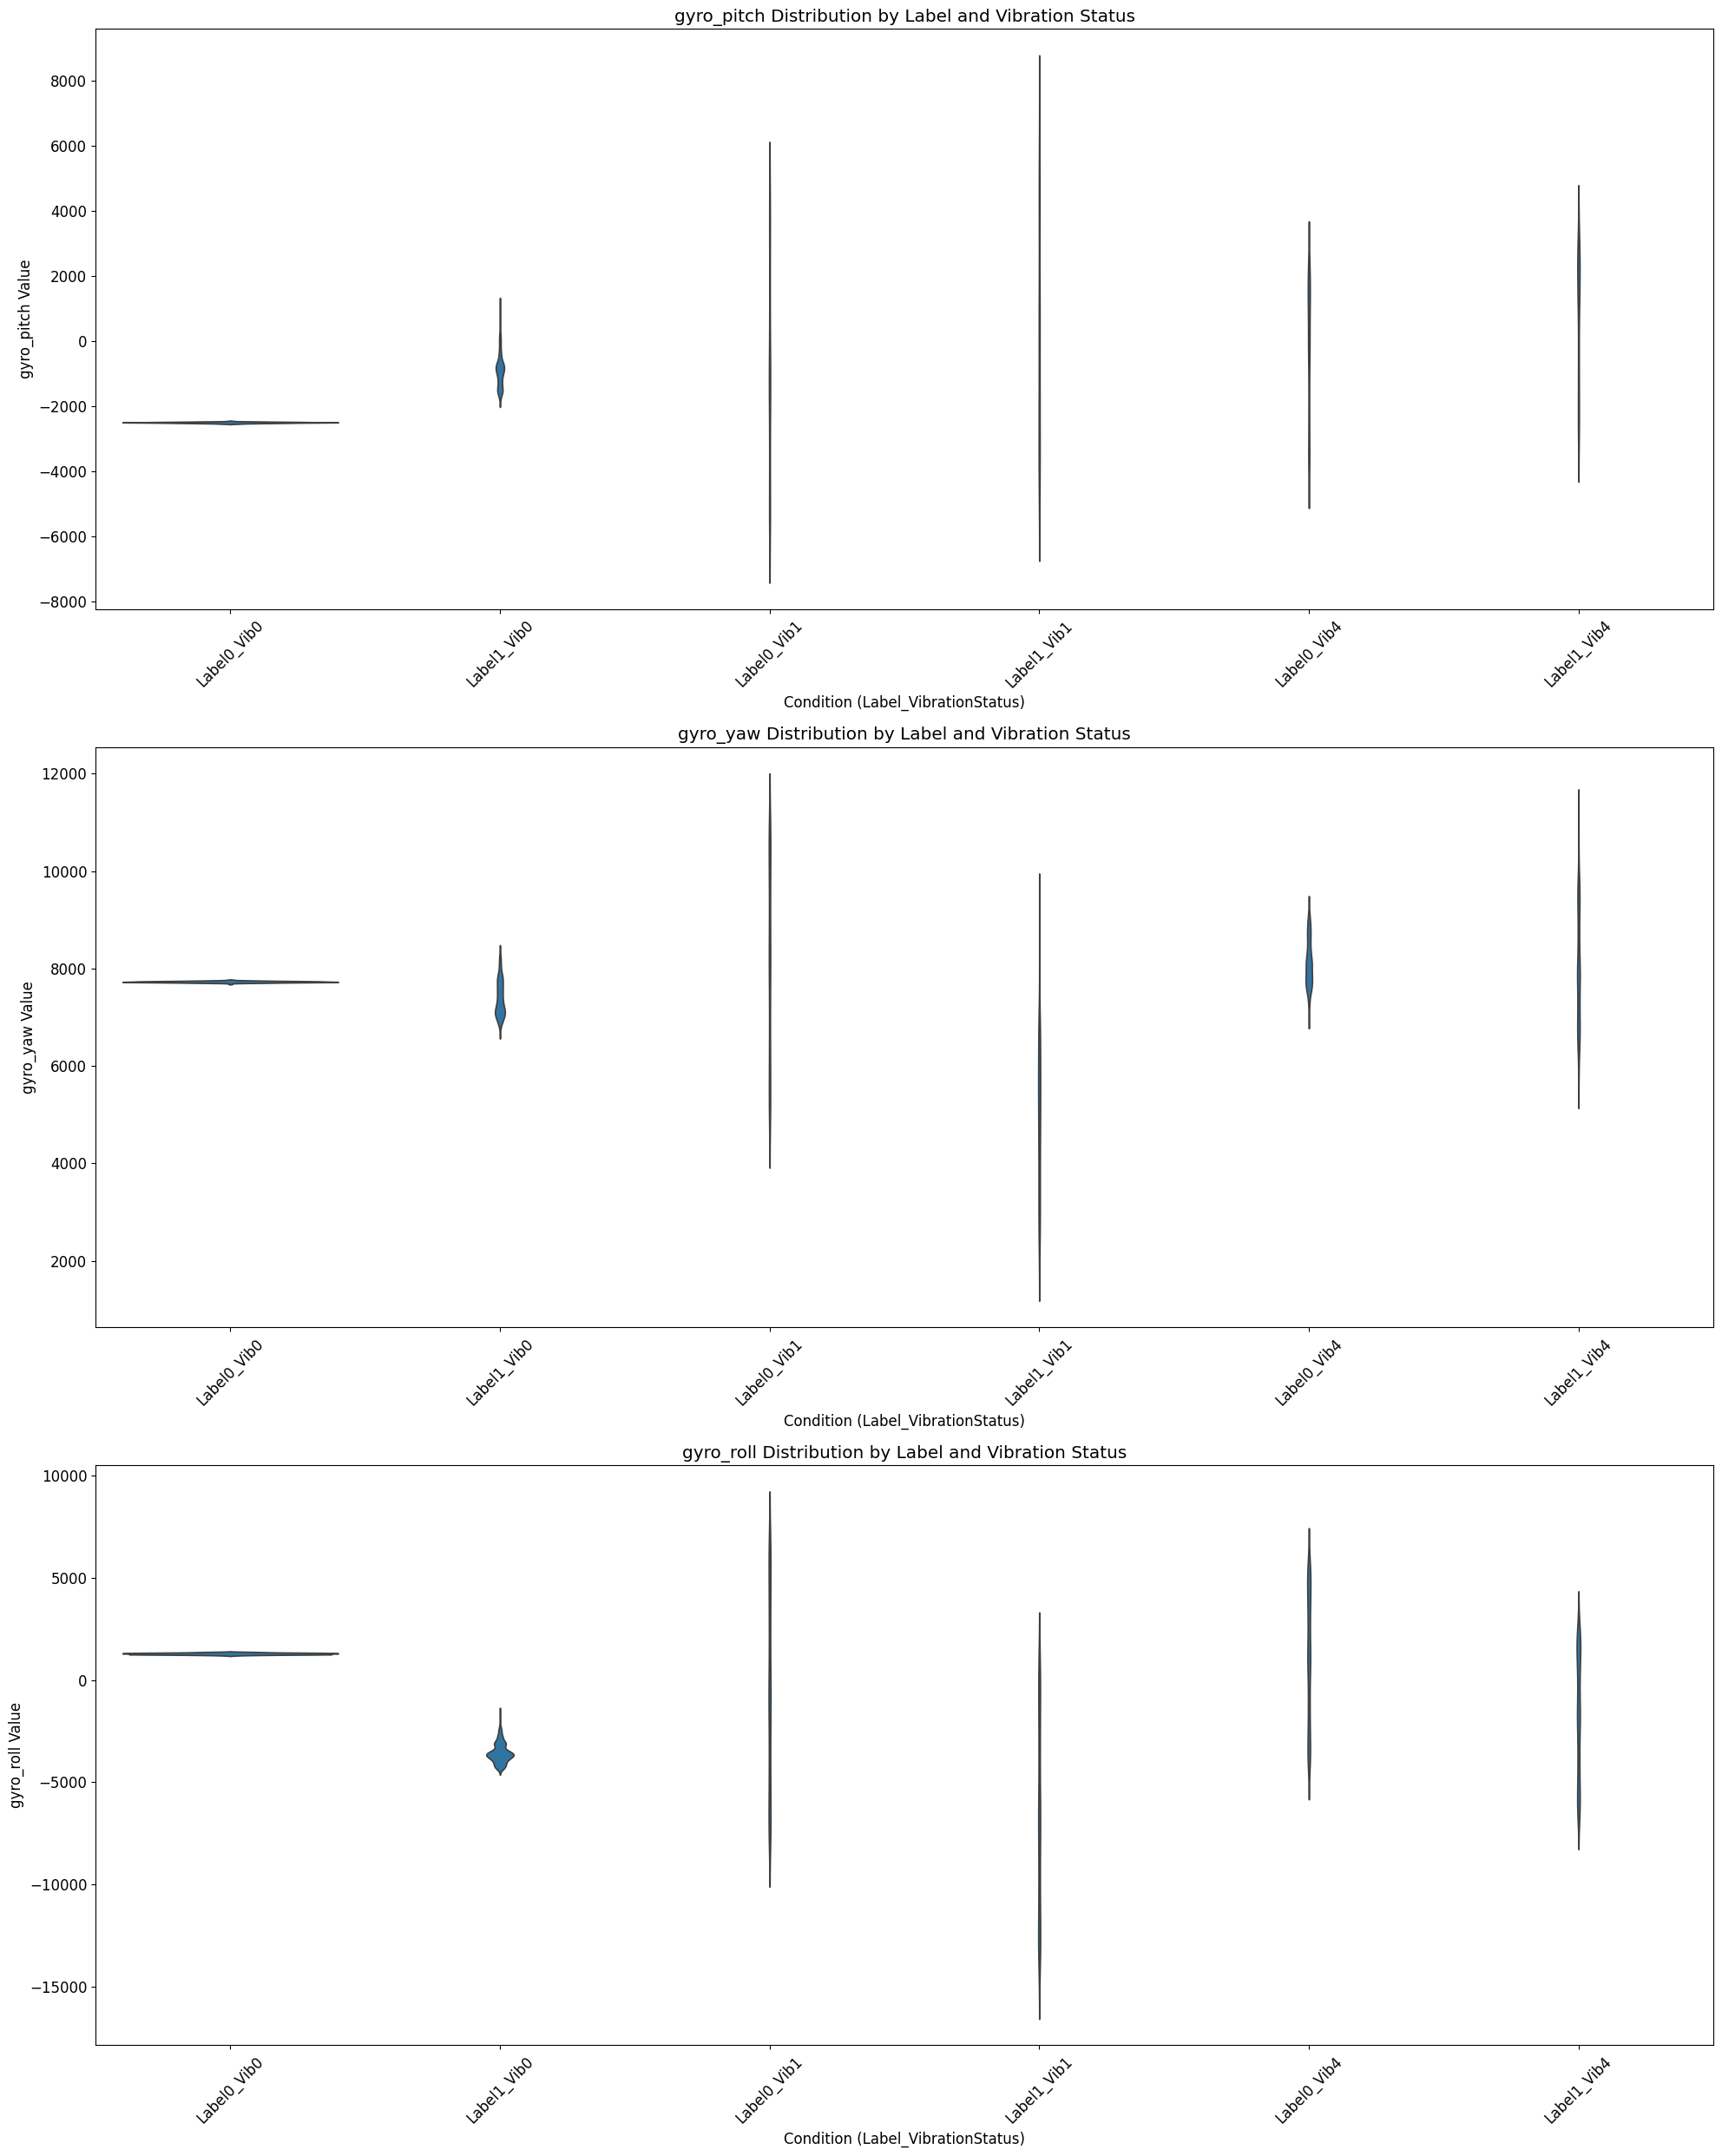


Statistical Summary for each condition:

acc_x statistics:
                           mean         std  min  max
label vibration_status                               
0     0                   2.254    1.239767    0    6
      1                   3.189   60.458751  -90  100
      4                   3.261    8.650648  -23   22
1     0                 174.890  135.298165 -149  525
      1                 -55.164  228.895851 -662  355
      4                  50.026  204.035658 -595  515

acc_y statistics:
                          mean         std  min  max
label vibration_status                              
0     0                  2.055    1.371808   -1    6
      1                  2.856  192.406038 -332  247
      4                 -7.641  108.991988 -187  180
1     0                 37.567  207.210598 -262  765
      1                -75.936  199.662839 -661  297
      4                 37.668  170.271637 -585  430

acc_z statistics:
                           mean         std  m

<Figure size 2000x1500 with 0 Axes>

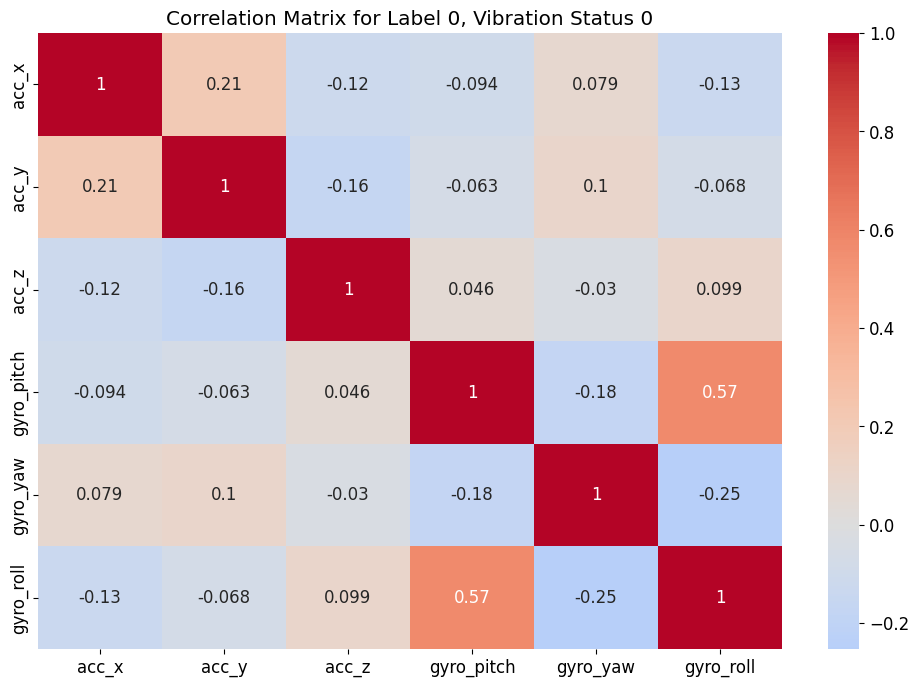

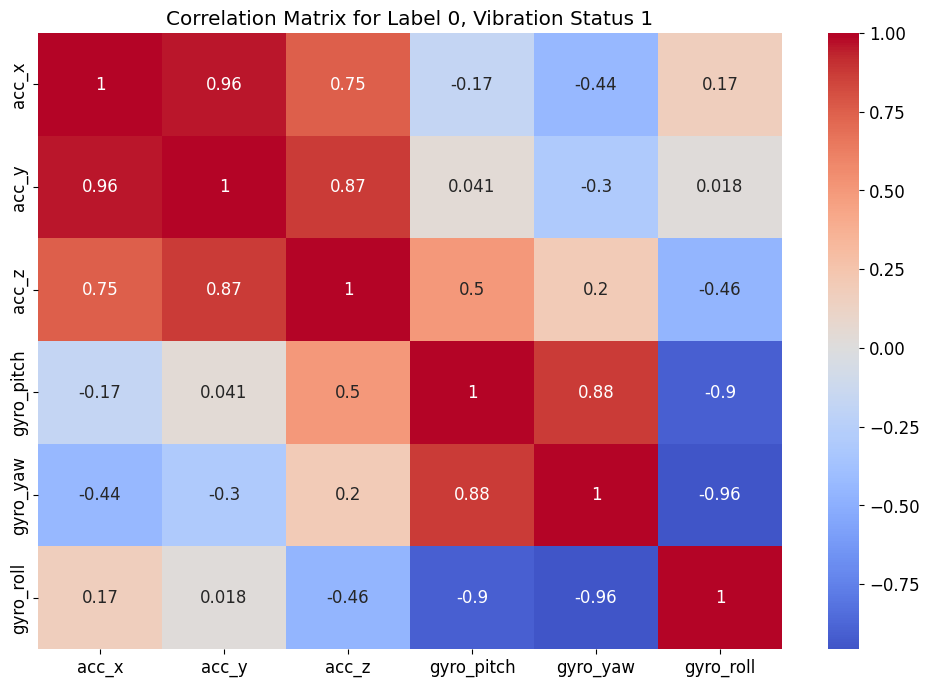

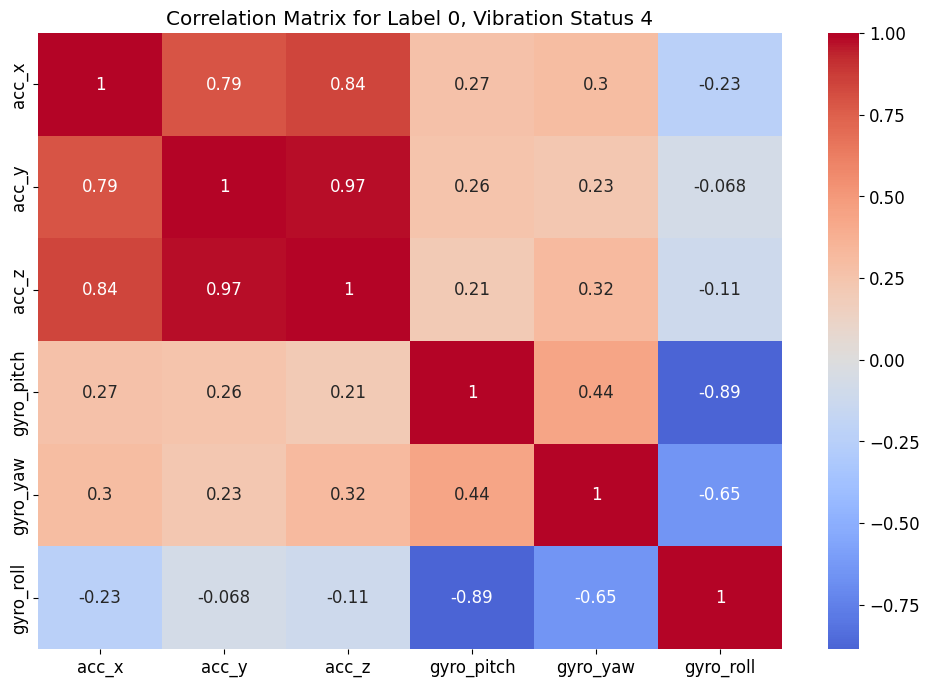

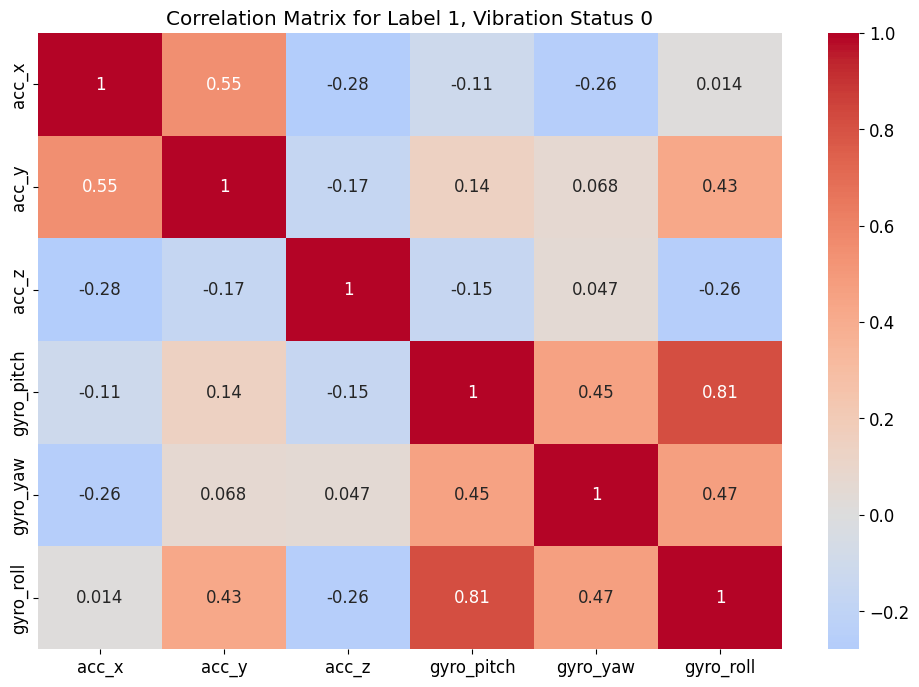

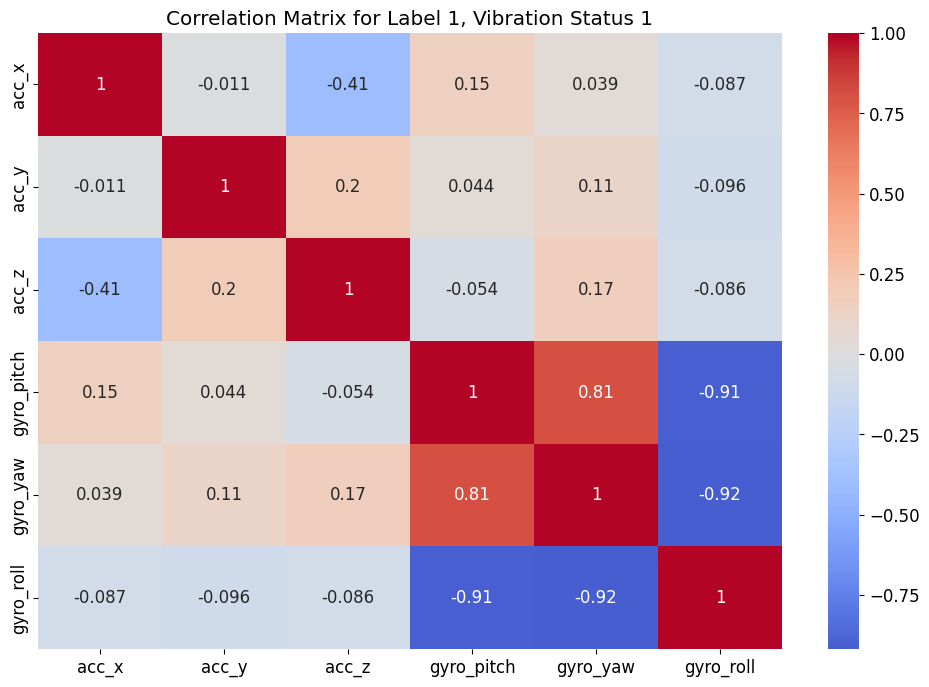

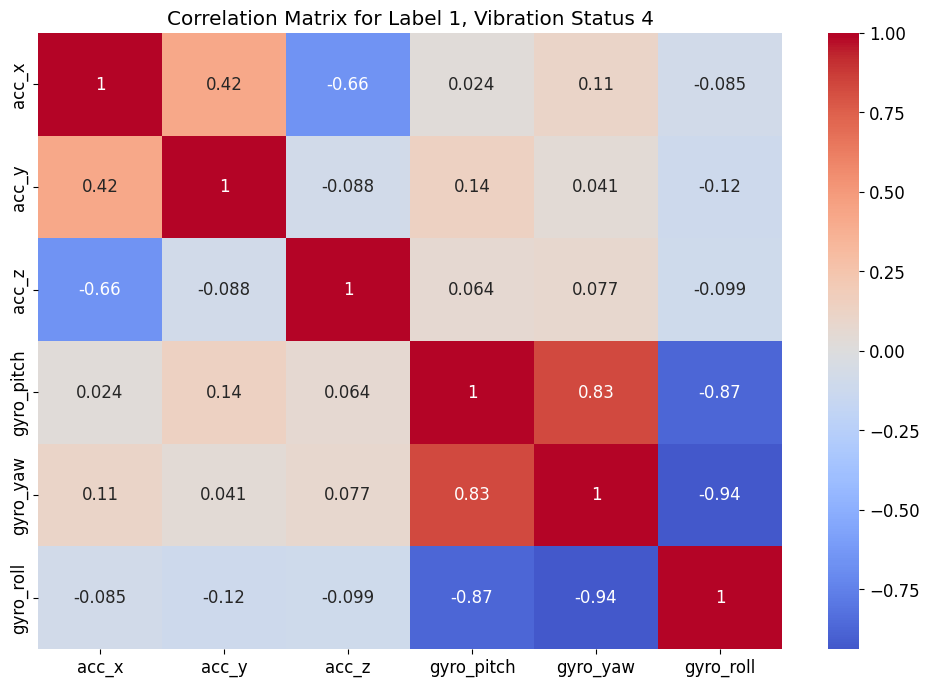

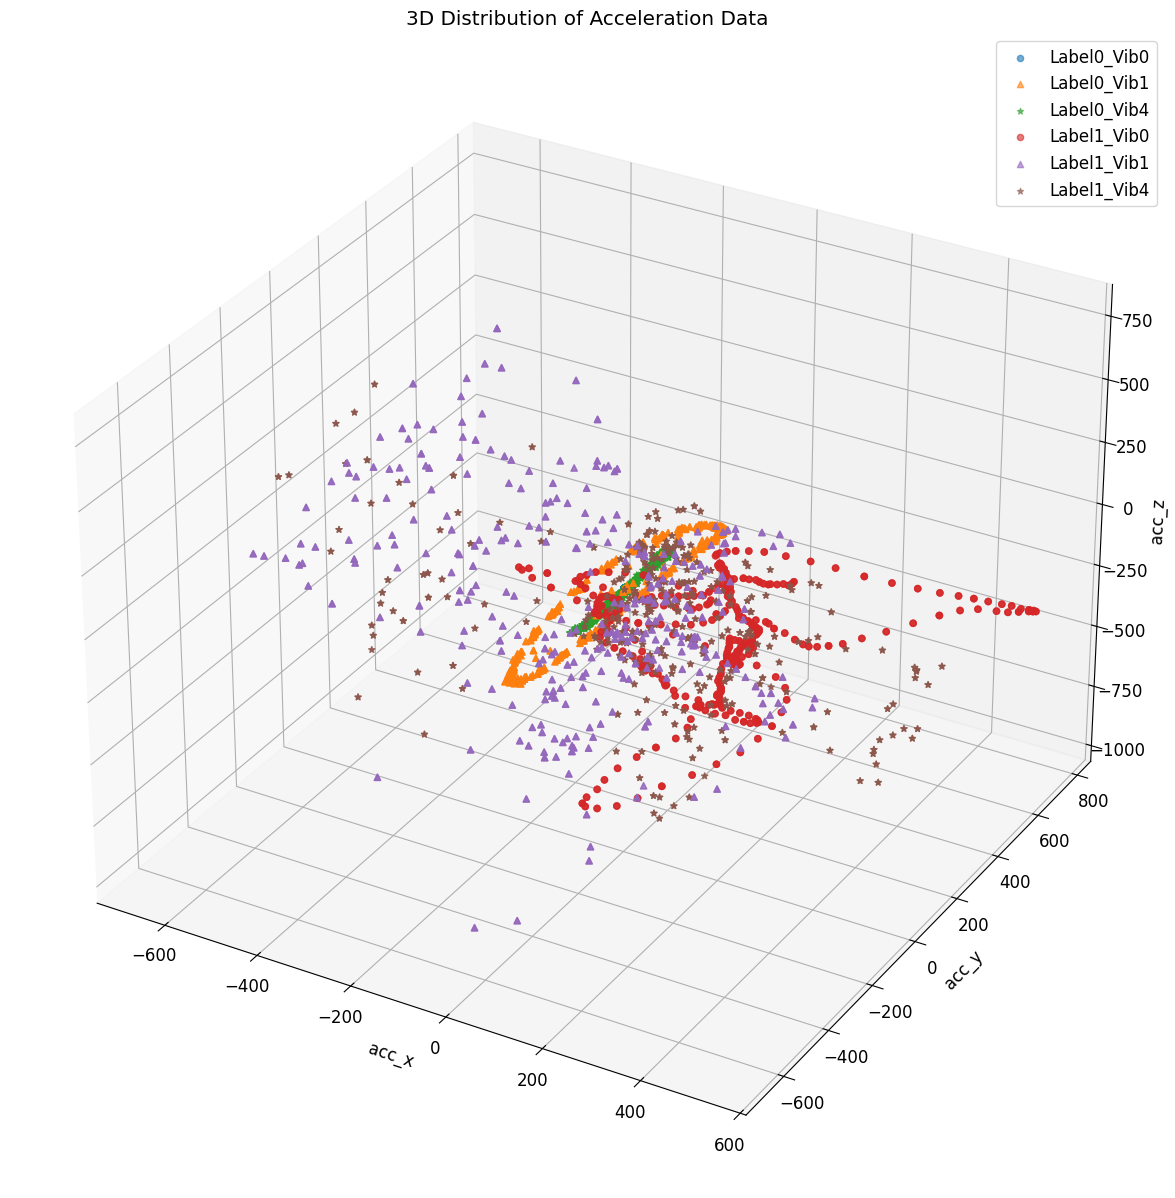

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style and figure parameters
plt.style.use('default')
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['font.size'] = 12

# Create condition labels for better readability
data['condition'] = data.apply(lambda x: f'Label{x.label}_Vib{x.vibration_status}', axis=1)

# 1. Violin plots for acceleration data
fig, axes = plt.subplots(3, 1, figsize=(20, 25))

# Plot acceleration data
for idx, sensor in enumerate(['acc_x', 'acc_y', 'acc_z']):
    sns.violinplot(data=data, x='condition', y=sensor, ax=axes[idx])
    axes[idx].set_title(f'{sensor} Distribution by Label and Vibration Status')
    axes[idx].set_xlabel('Condition (Label_VibrationStatus)')
    axes[idx].set_ylabel(f'{sensor} Value')
    # Rotate x-labels for better readability
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2. Violin plots for gyroscope data
fig, axes = plt.subplots(3, 1, figsize=(20, 25))

# Plot gyroscope data
for idx, sensor in enumerate(['gyro_pitch', 'gyro_yaw', 'gyro_roll']):
    sns.violinplot(data=data, x='condition', y=sensor, ax=axes[idx], inner=None)
    axes[idx].set_title(f'{sensor} Distribution by Label and Vibration Status')
    axes[idx].set_xlabel('Condition (Label_VibrationStatus)')
    axes[idx].set_ylabel(f'{sensor} Value')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Create a more detailed statistical summary
print("\nStatistical Summary for each condition:")
for sensor in ['acc_x', 'acc_y', 'acc_z', 'gyro_pitch', 'gyro_yaw', 'gyro_roll']:
    print(f"\n{sensor} statistics:")
    stats = data.groupby(['label', 'vibration_status'])[sensor].agg(['mean', 'std', 'min', 'max'])
    print(stats)

# 4. Create a pairplot for one specific condition to show relationships between sensors
plt.figure(figsize=(20, 15))
for label in [0, 1]:
    for vib in [0, 1, 2, 3,4]:
        condition_data = data[(data['label'] == label) & (data['vibration_status'] == vib)]
        
        if len(condition_data) > 0:  # Check if we have data for this condition
            plt.figure(figsize=(12, 8))
            sensor_cols = ['acc_x', 'acc_y', 'acc_z', 'gyro_pitch', 'gyro_yaw', 'gyro_roll']
            correlation = condition_data[sensor_cols].corr()
            
            sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
            plt.title(f'Correlation Matrix for Label {label}, Vibration Status {vib}')
            plt.show()

# 5. Create a 3D scatter plot for acceleration data
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Create different markers and colors for each condition
markers = ['o', '^', 's', 'D','*']
colors = ['b', 'r', 'g', 'y','m']

for label in [0, 1]:
    for vib in [0, 1, 2, 3,4]:
        condition_data = data[(data['label'] == label) & (data['vibration_status'] == vib)]
        if len(condition_data) > 0:
            # Sample a subset of points to avoid overcrowding
            sample_size = min(1000, len(condition_data))
            sampled_data = condition_data.sample(n=sample_size)
            
            ax.scatter(sampled_data['acc_x'], 
                      sampled_data['acc_y'], 
                      sampled_data['acc_z'],
                      label=f'Label{label}_Vib{vib}',
                      marker=markers[vib],
                      alpha=0.6)

ax.set_xlabel('acc_x')
ax.set_ylabel('acc_y')
ax.set_zlabel('acc_z')
ax.set_title('3D Distribution of Acceleration Data')
ax.legend()
plt.show()

### 1.4 Data visualization - UMAP
 

#### 1.4.1 Pairwise plot

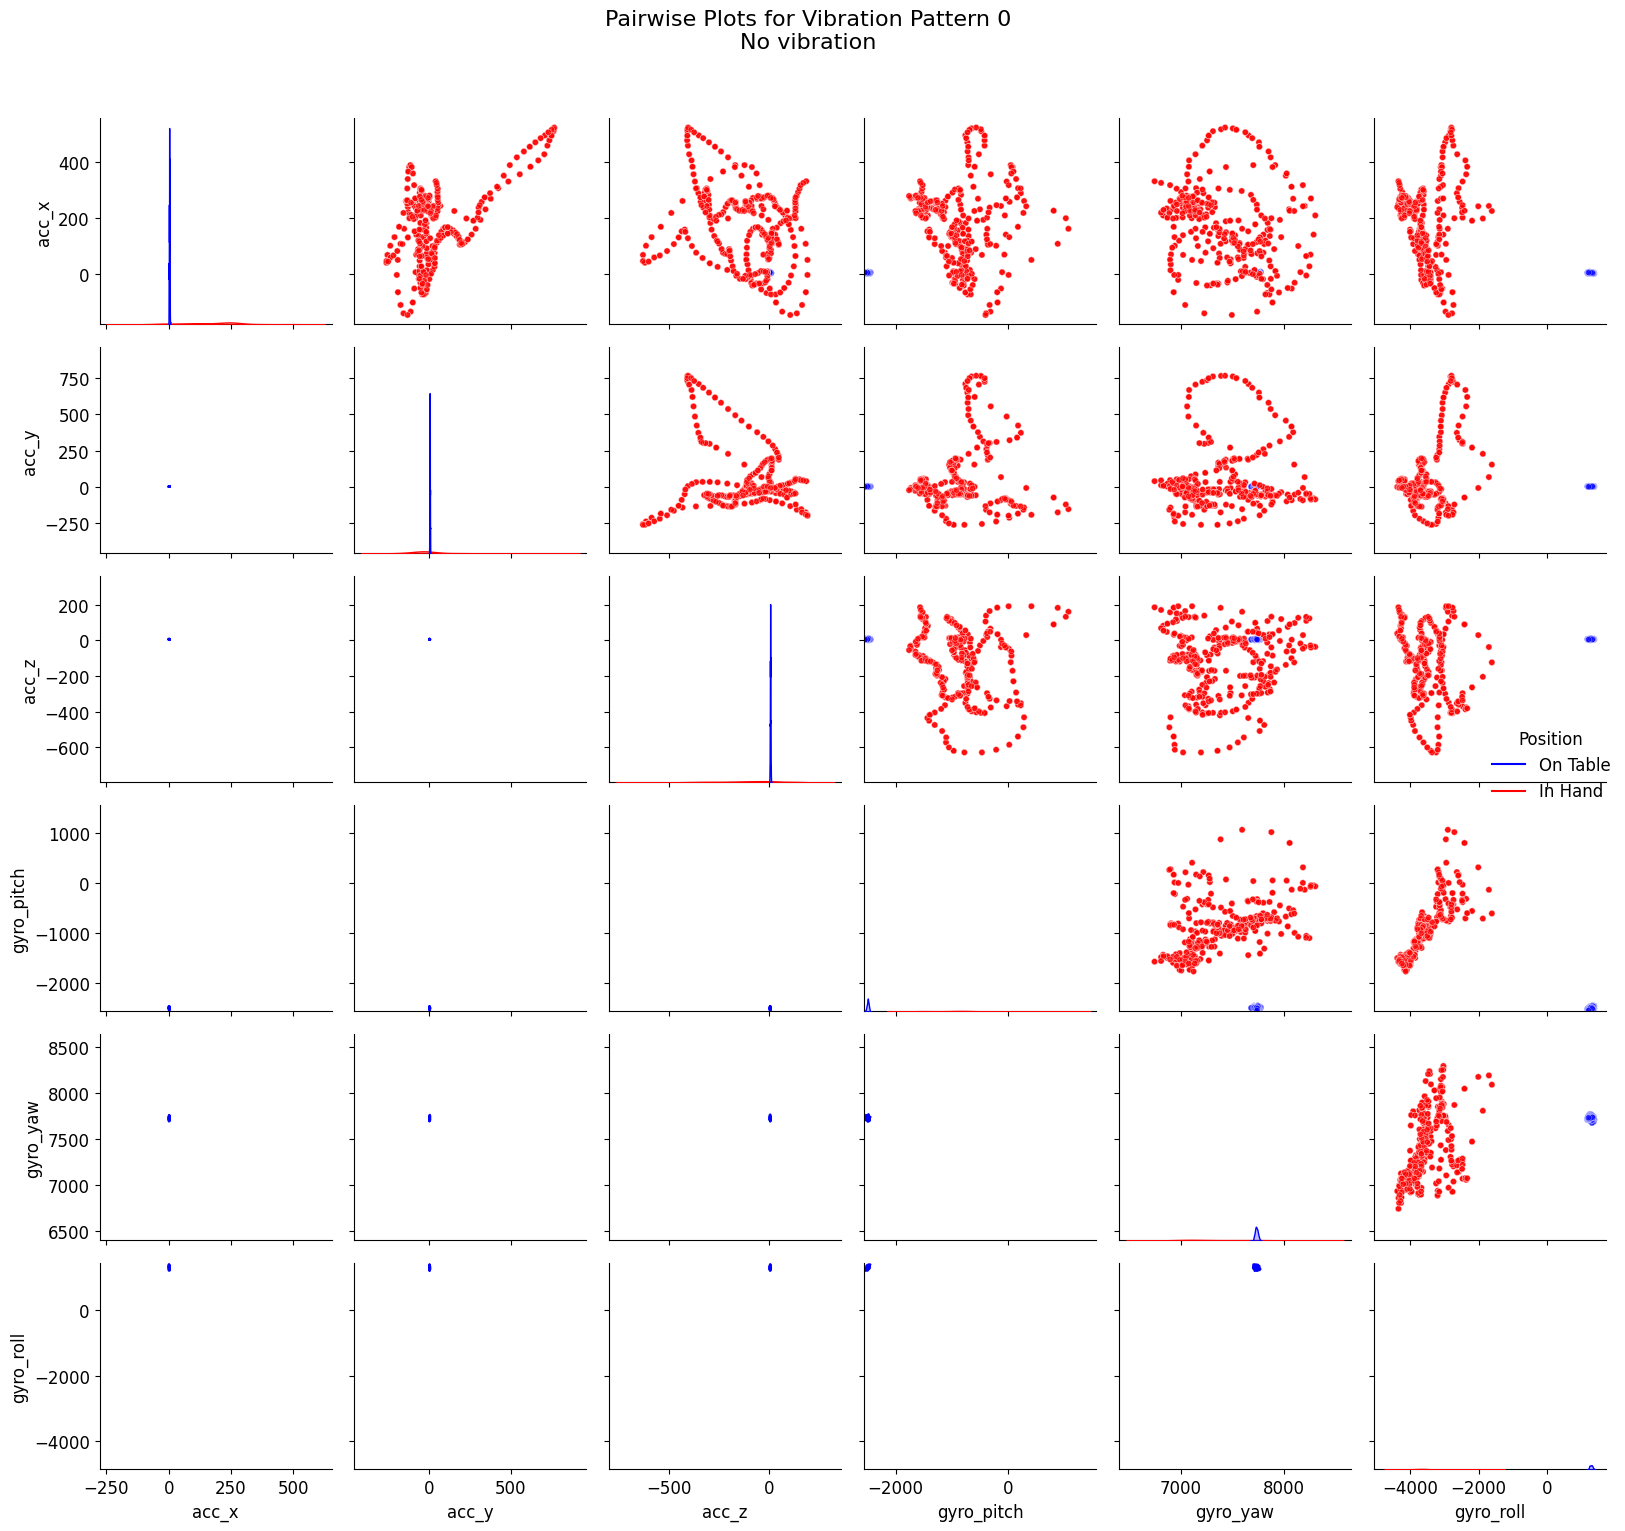

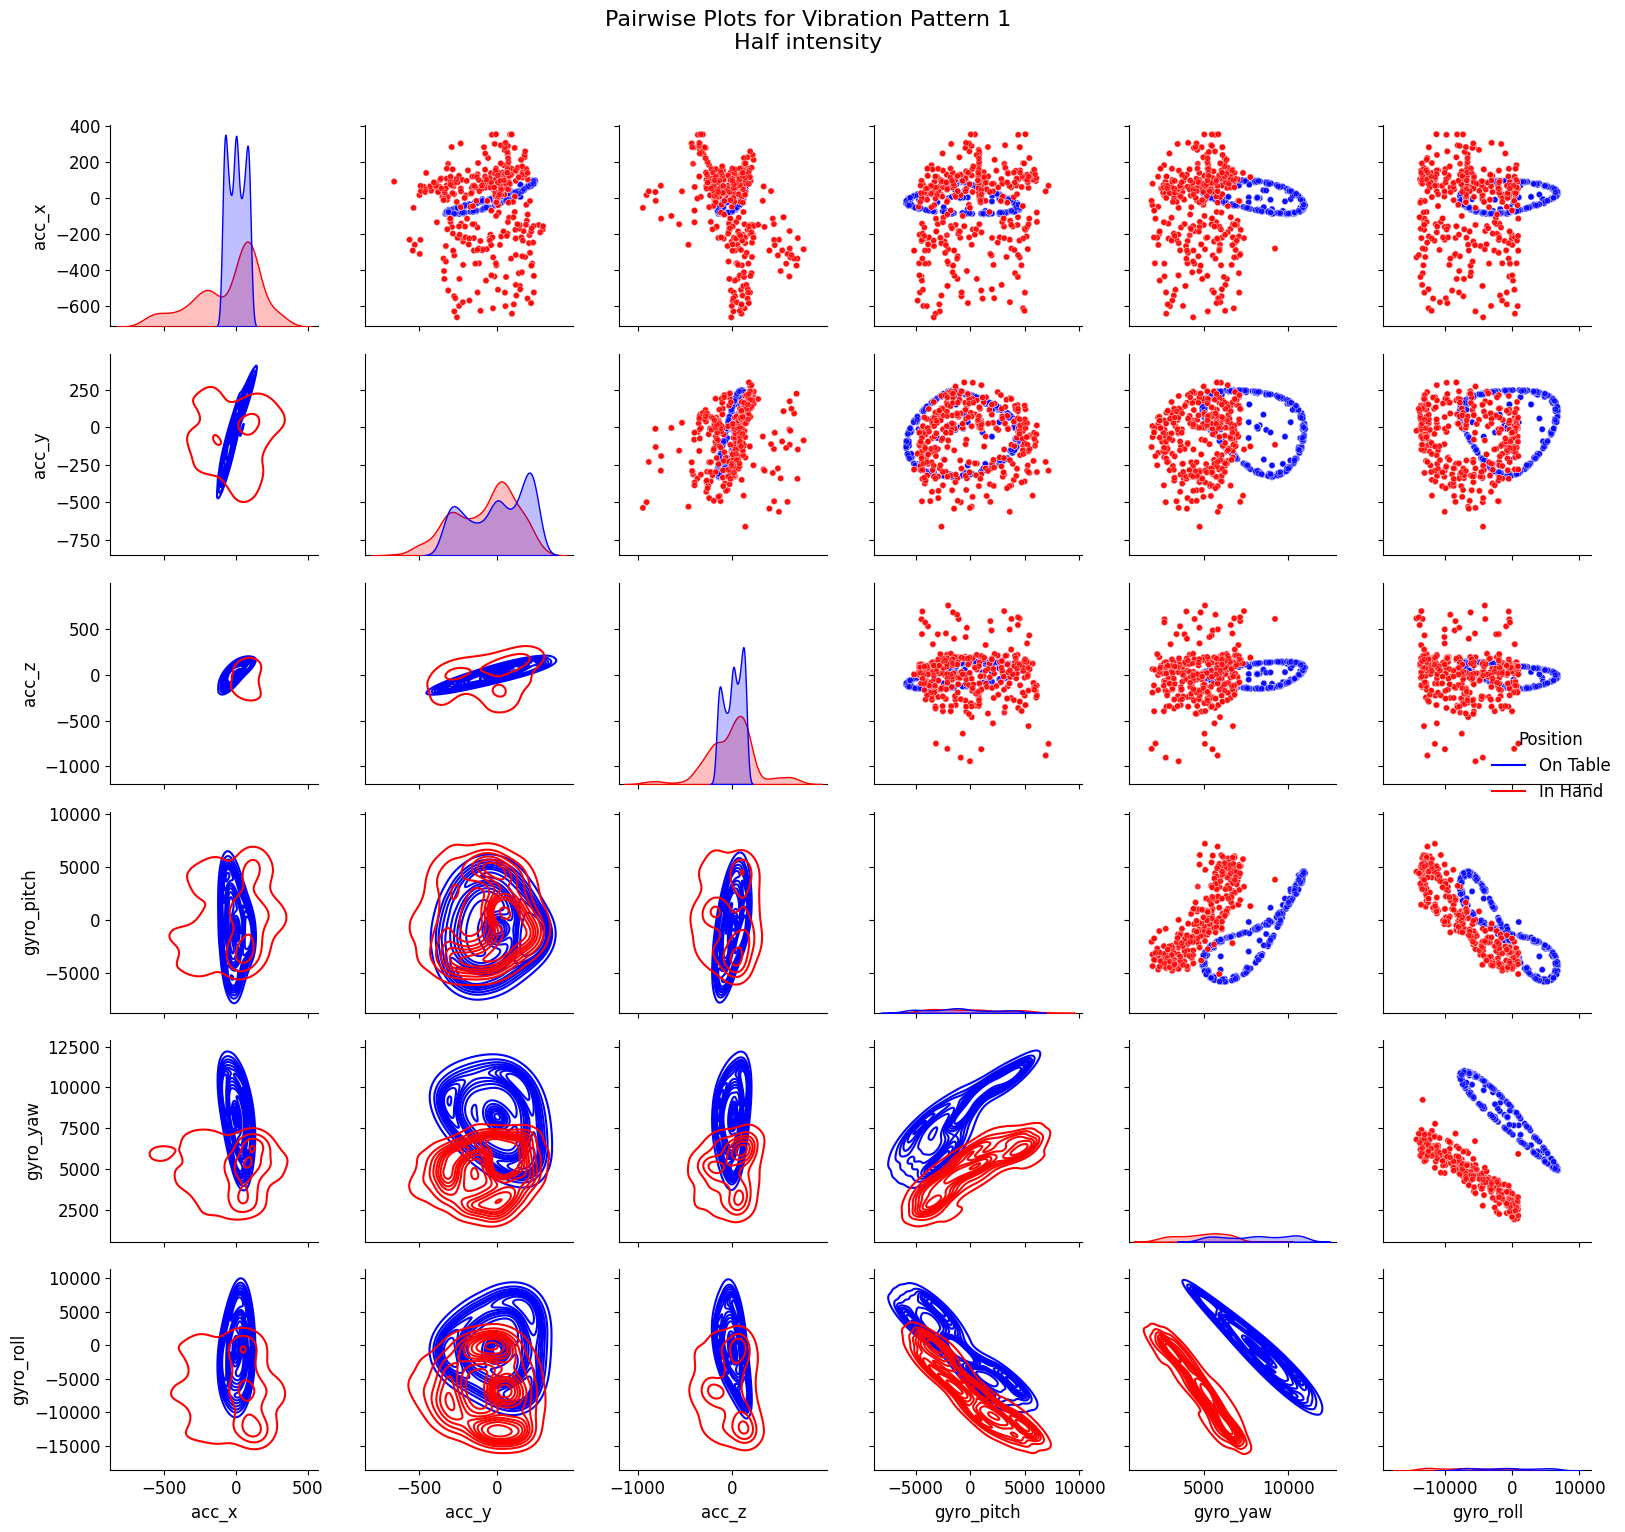

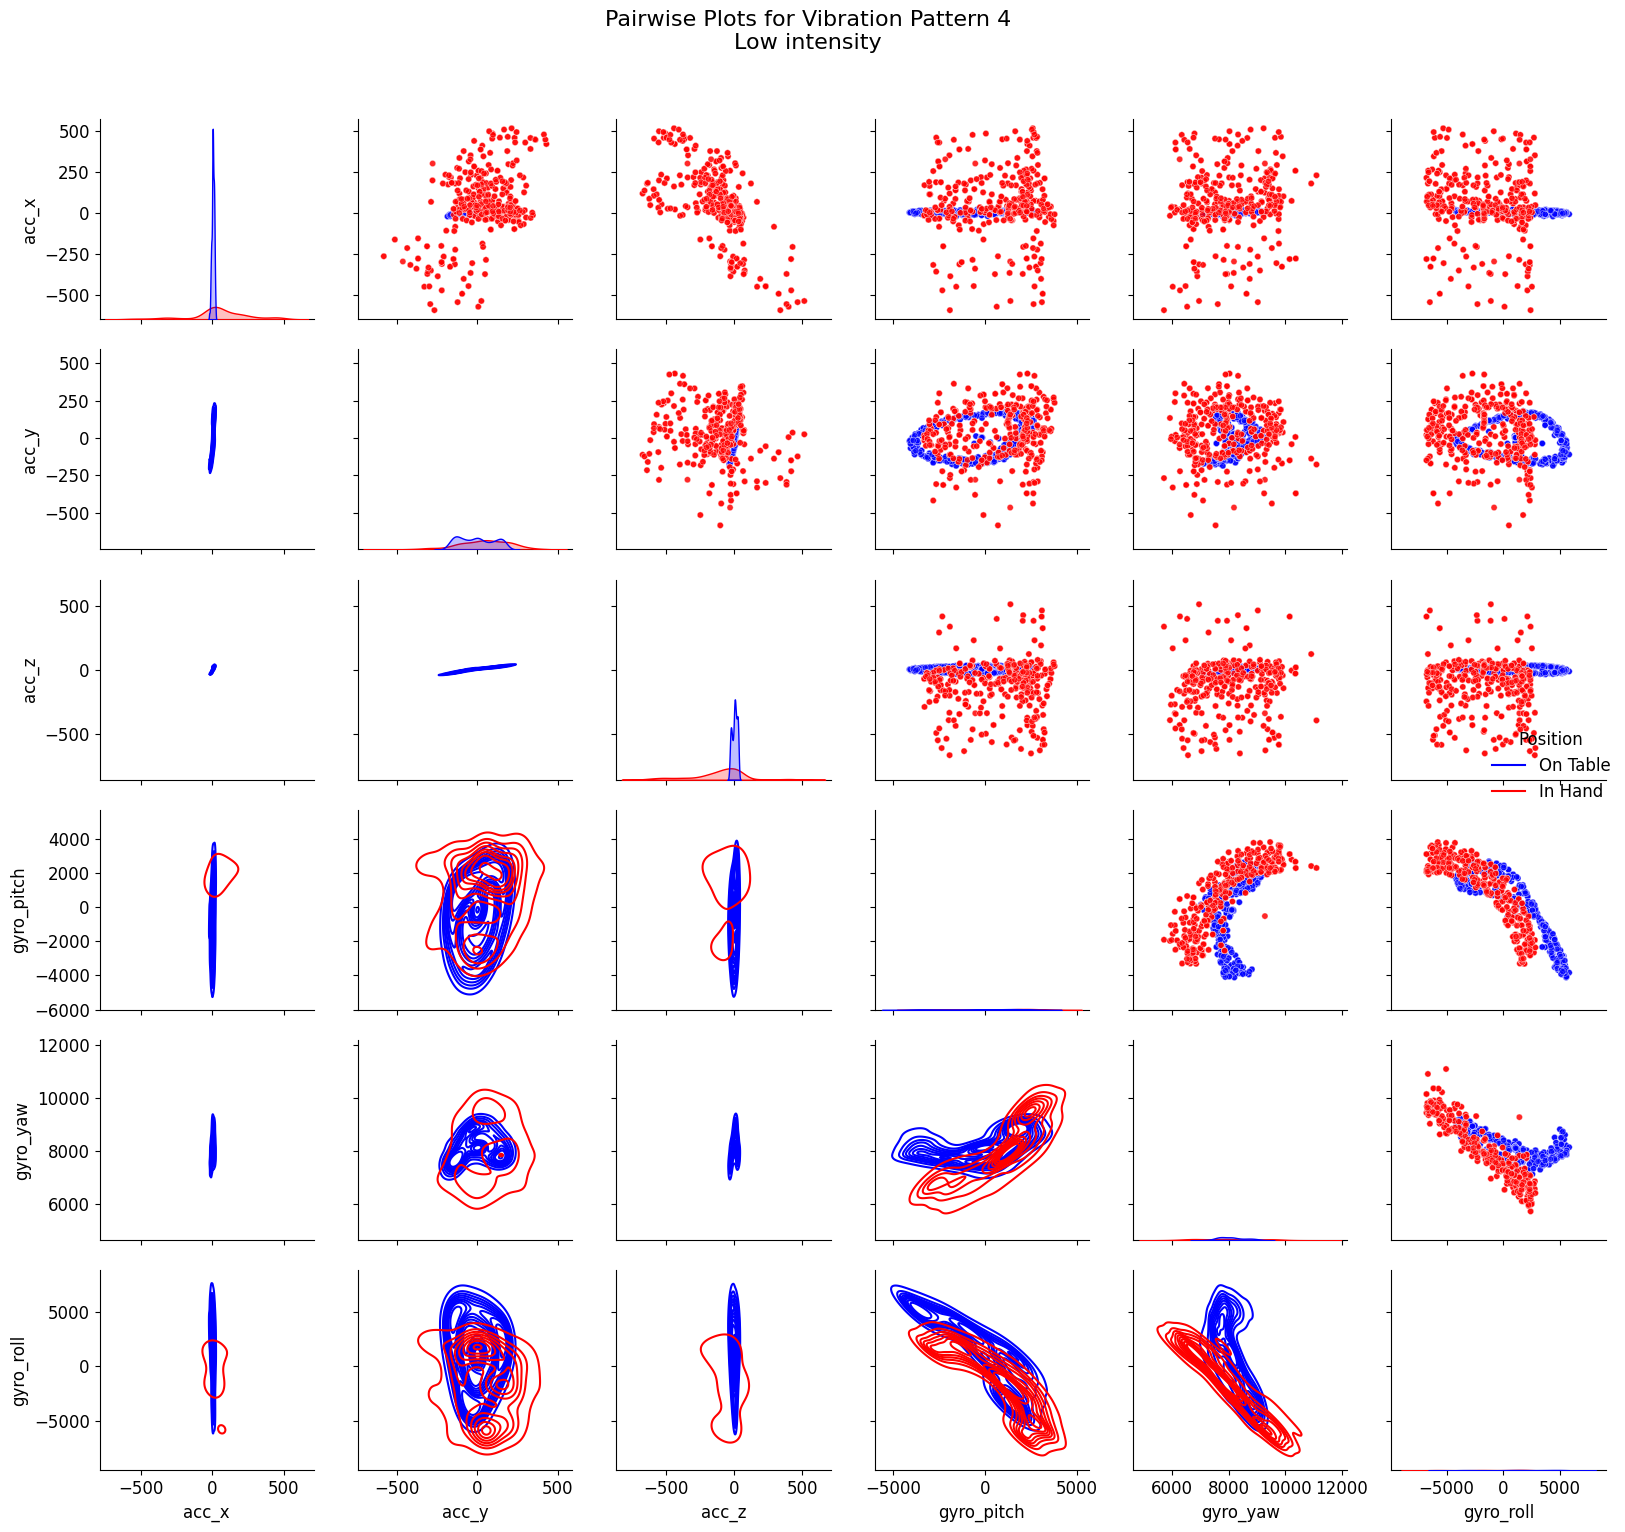

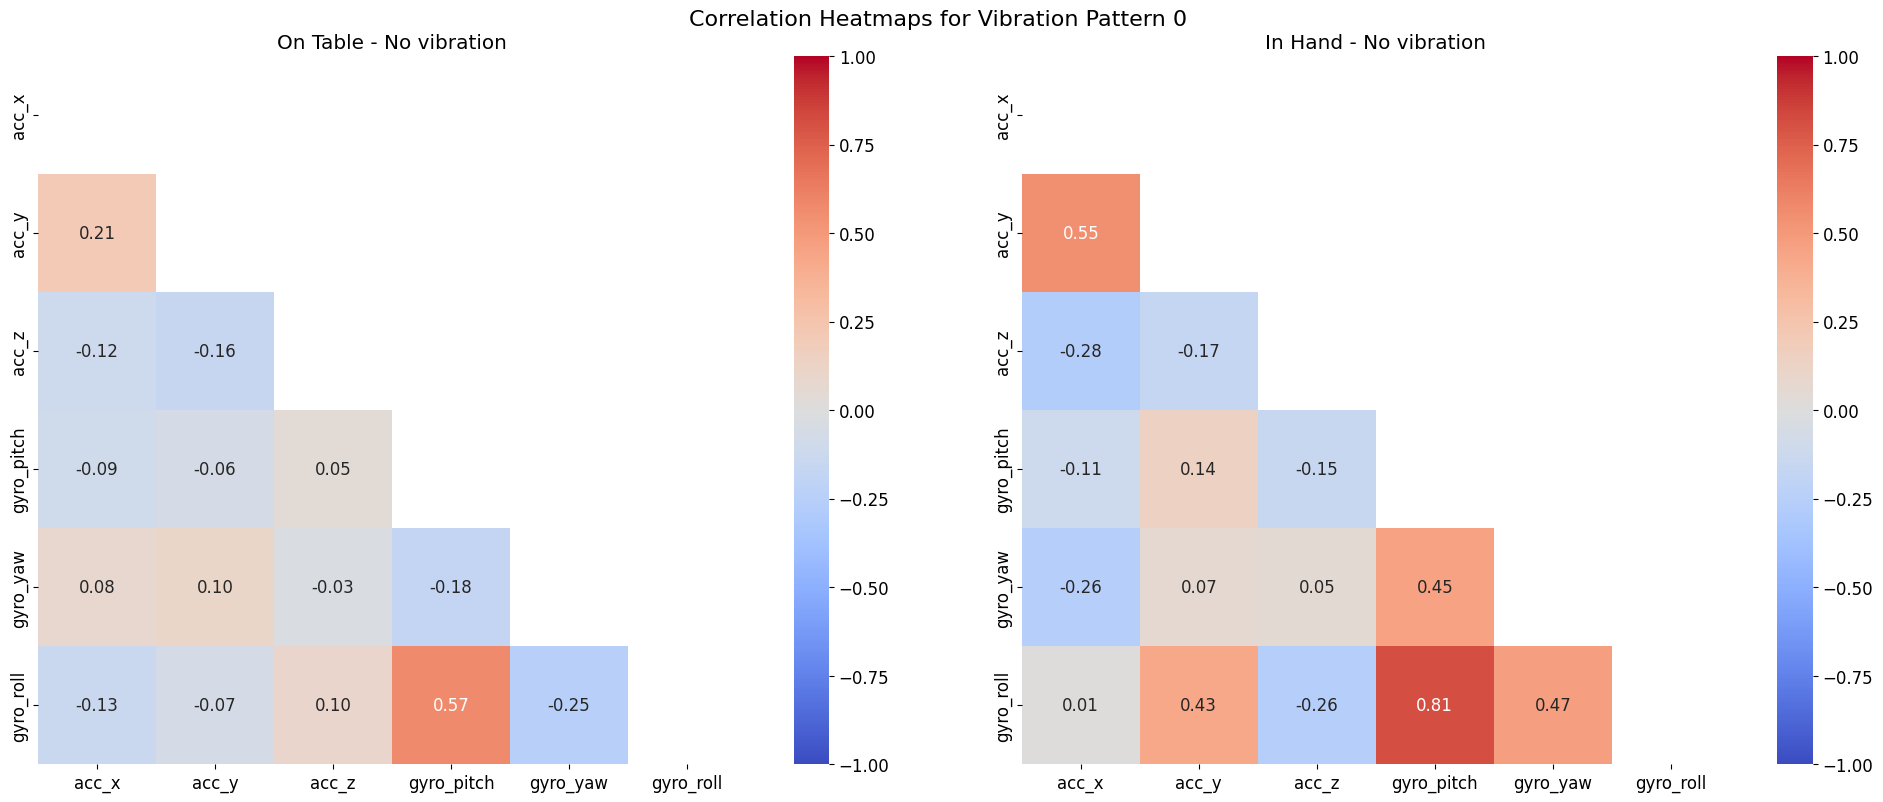

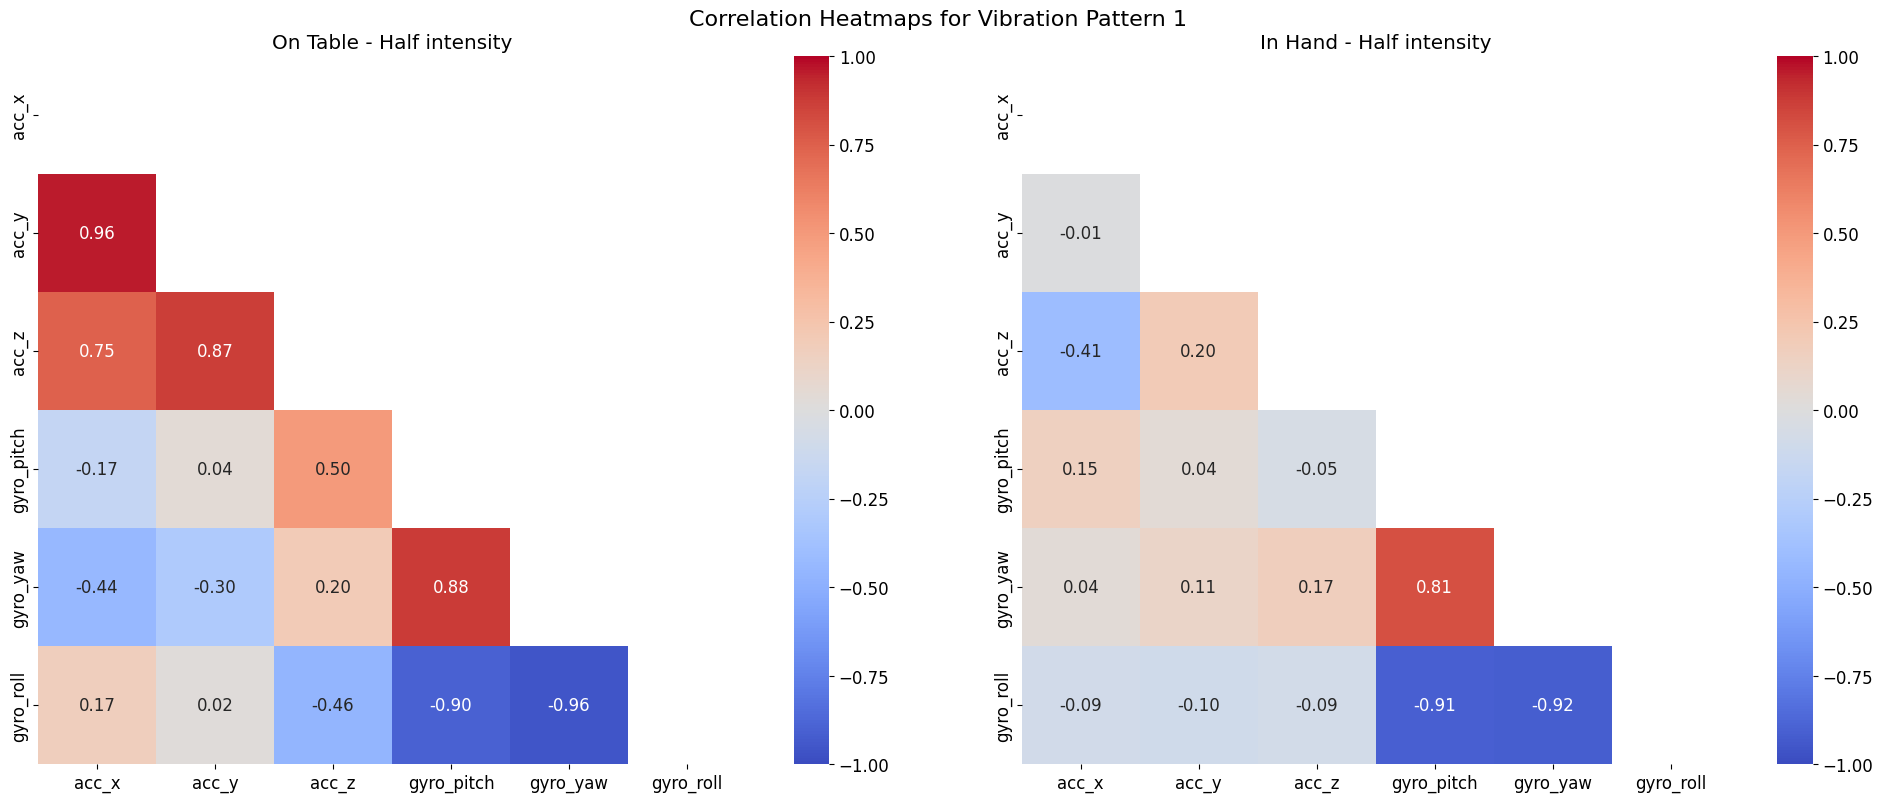

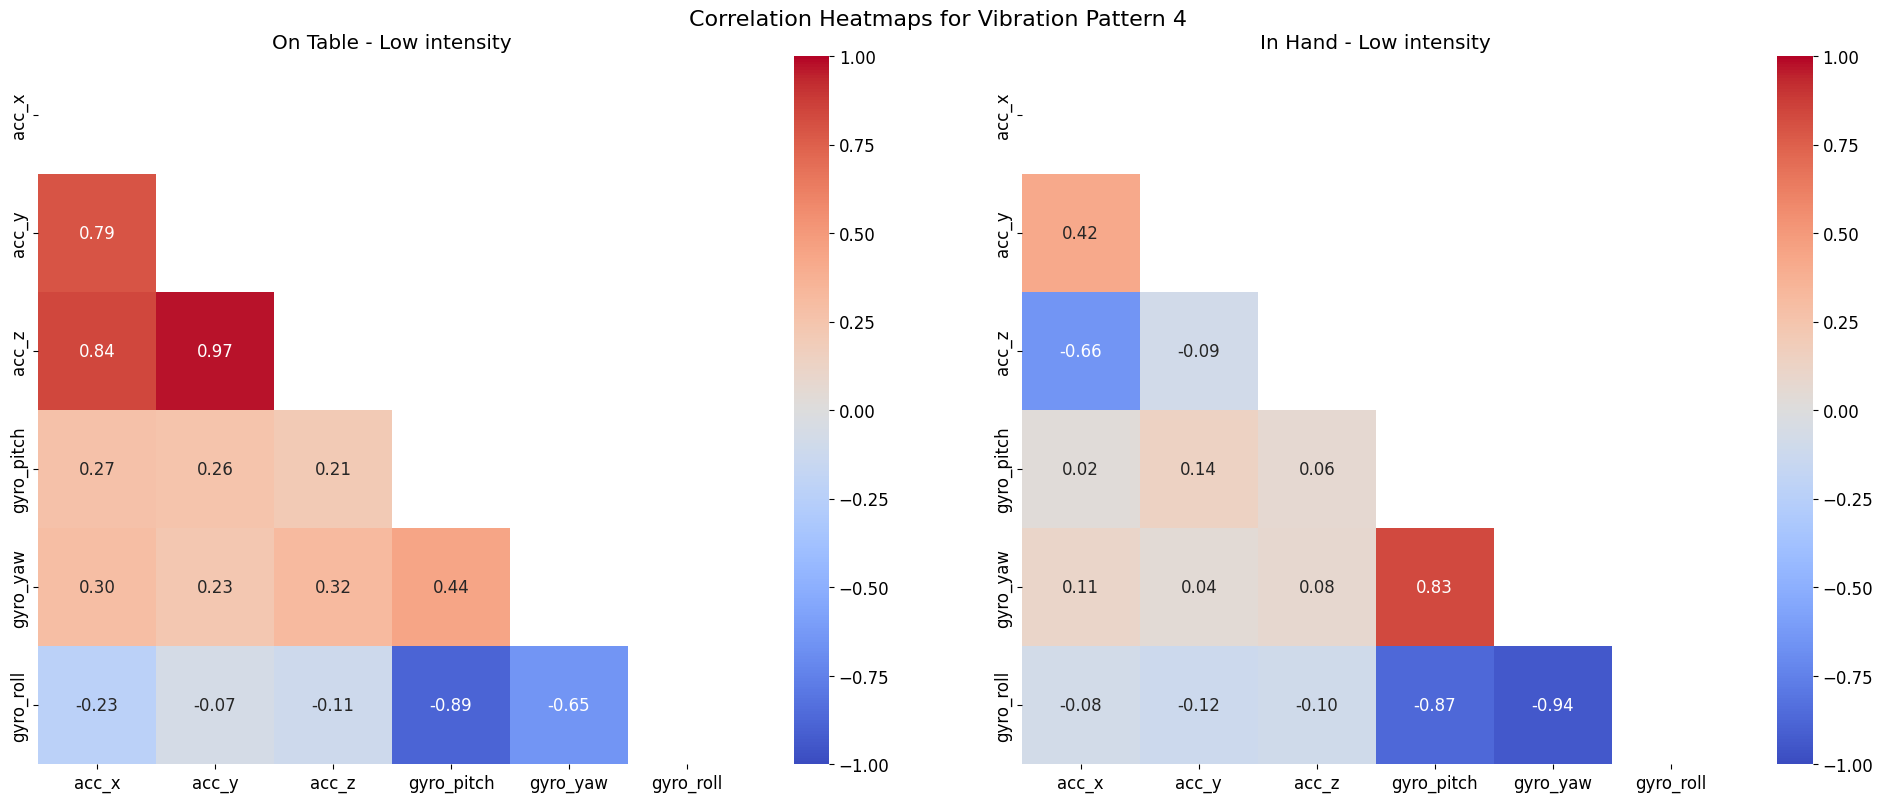


Summary Statistics Comparison:

=== Vibration Pattern 0 (No vibration) ===

On Table:
         acc_x    acc_y    acc_z  gyro_pitch  gyro_yaw  gyro_roll
count  1000.00  1000.00  1000.00     1000.00   1000.00     1000.0
mean      2.25     2.06     6.05    -2497.30   7728.82     1289.9
std       1.24     1.37     1.43       17.33     14.46       40.7
min       0.00    -1.00     2.00    -2546.00   7680.00     1190.0
25%       1.00     1.00     5.00    -2508.00   7719.00     1258.0
50%       2.00     2.00     6.00    -2496.00   7728.00     1290.0
75%       3.00     3.00     7.00    -2485.00   7738.00     1320.0
max       6.00     6.00    11.00    -2449.00   7770.00     1383.0

In Hand:
         acc_x    acc_y    acc_z  gyro_pitch  gyro_yaw  gyro_roll
count  1000.00  1000.00  1000.00     1000.00   1000.00    1000.00
mean    174.89    37.57  -120.30     -892.25   7397.90   -3541.08
std     135.30   207.21   177.32      518.38    363.55     502.60
min    -149.00  -262.00  -628.00    -1762.00 

In [49]:
# pairwise plot for the data 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style and figure size
plt.style.use('default')
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['font.size'] = 12

# Define vibration pattern dictionary
vib_pattern={
    0:"No vibration",
    1:"Half intensity",
    2:"Full intensity",
    3:"1hz sin wave",
    4:"Low intensity",
    8:"Minimum intensity"
}

# Select only the sensor data columns
sensor_cols = ['acc_x', 'acc_y', 'acc_z', 'gyro_pitch', 'gyro_yaw', 'gyro_roll']

# Create pairwise plots for each vibration pattern
for vib in [0, 1, 2, 3, 4]:  # For each vibration pattern
    # Get data for both labels (on table and in hand) for this vibration pattern
    table_data = data[(data['label'] == 0) & (data['vibration_status'] == vib)]
    hand_data = data[(data['label'] == 1) & (data['vibration_status'] == vib)]
    
    if len(table_data) > 0 and len(hand_data) > 0:
        # Sample data to prevent overcrowding
        sample_size = min(1000, min(len(table_data), len(hand_data)))
        table_sampled = table_data[sensor_cols].sample(n=sample_size)
        hand_sampled = hand_data[sensor_cols].sample(n=sample_size)
        
        # Add label column for coloring
        table_sampled['Position'] = 'On Table'
        hand_sampled['Position'] = 'In Hand'
        
        # Combine the data
        combined_data = pd.concat([table_sampled, hand_sampled])
        
        # Create pairwise plot
        g = sns.PairGrid(combined_data, hue='Position', 
                        palette=['blue', 'red'])
        
        # Customize the plots
        g.map_diag(sns.kdeplot, fill=True)
        g.map_upper(sns.scatterplot, alpha=0.6, s=20)
        g.map_lower(sns.kdeplot)
        
        # Add legend and title
        g.add_legend(title='Position')
        plt.suptitle(f'Pairwise Plots for Vibration Pattern {vib}\n{vib_pattern[vib]}', 
                    y=1.02, size=16)
        plt.tight_layout()
        plt.show()

# Create correlation heatmaps side by side for each vibration pattern
for vib in [0, 1, 2, 3, 4]:
    table_data = data[(data['label'] == 0) & (data['vibration_status'] == vib)]
    hand_data = data[(data['label'] == 1) & (data['vibration_status'] == vib)]
    
    if len(table_data) > 0 and len(hand_data) > 0:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Correlation for table data
        corr_table = table_data[sensor_cols].corr()
        mask = np.triu(np.ones_like(corr_table, dtype=bool))
        sns.heatmap(corr_table, 
                   mask=mask,
                   annot=True, 
                   cmap='coolwarm', 
                   center=0,
                   fmt='.2f',
                   square=True,
                   vmin=-1, vmax=1,
                   ax=ax1)
        ax1.set_title(f'On Table - {vib_pattern[vib]}')
        
        # Correlation for hand data
        corr_hand = hand_data[sensor_cols].corr()
        sns.heatmap(corr_hand, 
                   mask=mask,
                   annot=True, 
                   cmap='coolwarm', 
                   center=0,
                   fmt='.2f',
                   square=True,
                   vmin=-1, vmax=1,
                   ax=ax2)
        ax2.set_title(f'In Hand - {vib_pattern[vib]}')
        
        plt.suptitle(f'Correlation Heatmaps for Vibration Pattern {vib}', size=16)
        plt.tight_layout()
        plt.show()

# Print summary statistics comparing table vs hand for each vibration pattern
print("\nSummary Statistics Comparison:")
for vib in [0, 1, 2, 3, 4]:
    print(f"\n=== Vibration Pattern {vib} ({vib_pattern[vib]}) ===")
    
    table_data = data[(data['label'] == 0) & (data['vibration_status'] == vib)]
    hand_data = data[(data['label'] == 1) & (data['vibration_status'] == vib)]
    
    if len(table_data) > 0 and len(hand_data) > 0:
        print("\nOn Table:")
        print(table_data[sensor_cols].describe().round(2))
        print("\nIn Hand:")
        print(hand_data[sensor_cols].describe().round(2))

/var/folders/4m/4mq00kz14230_q153p1_qdn80000gn/T/ipykernel_37862/1797968134.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = sampled_data.groupby('vibration_status').apply(


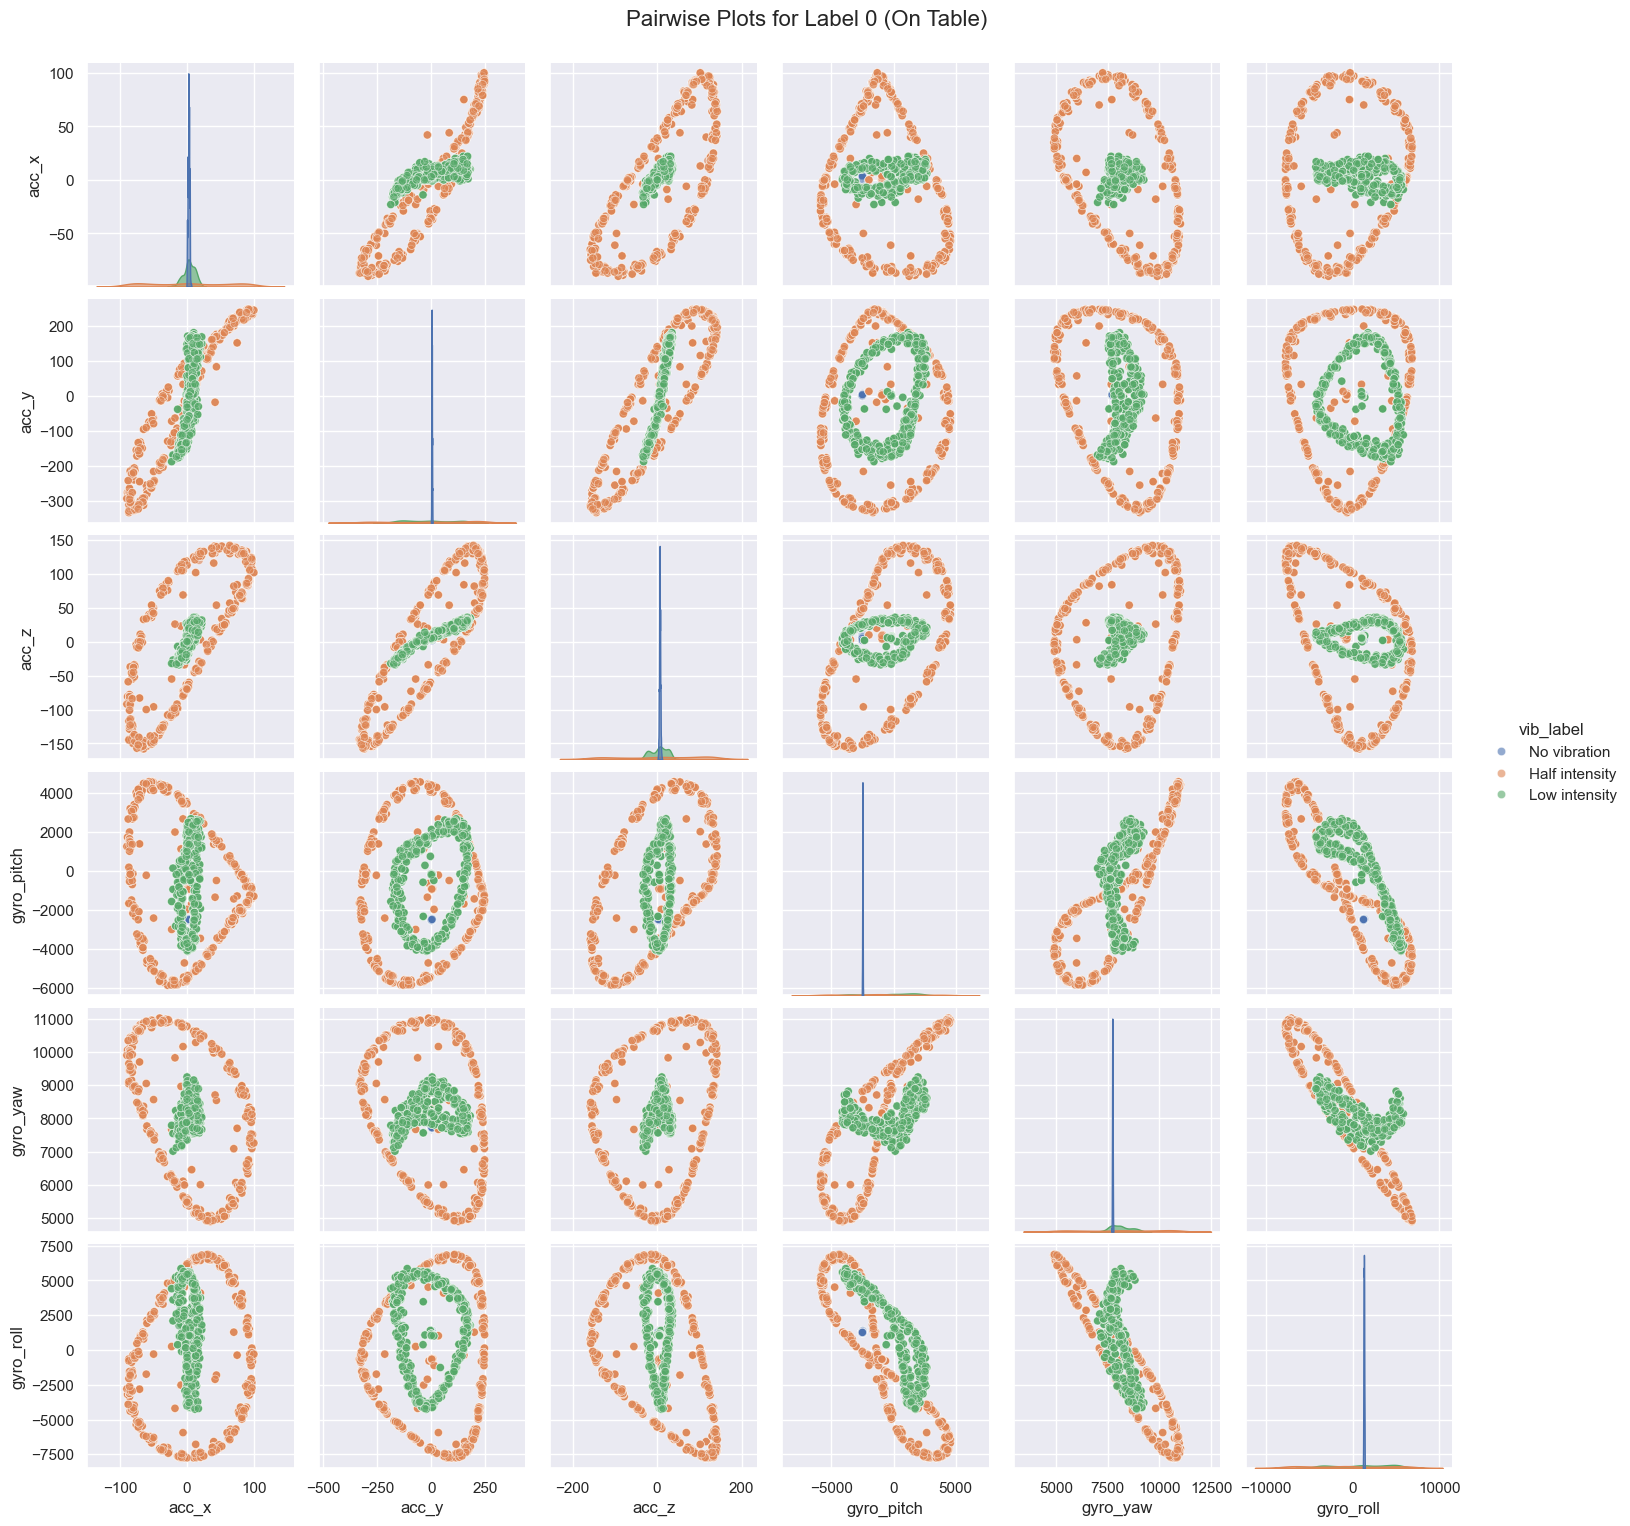

/var/folders/4m/4mq00kz14230_q153p1_qdn80000gn/T/ipykernel_37862/1797968134.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = sampled_data.groupby('vibration_status').apply(


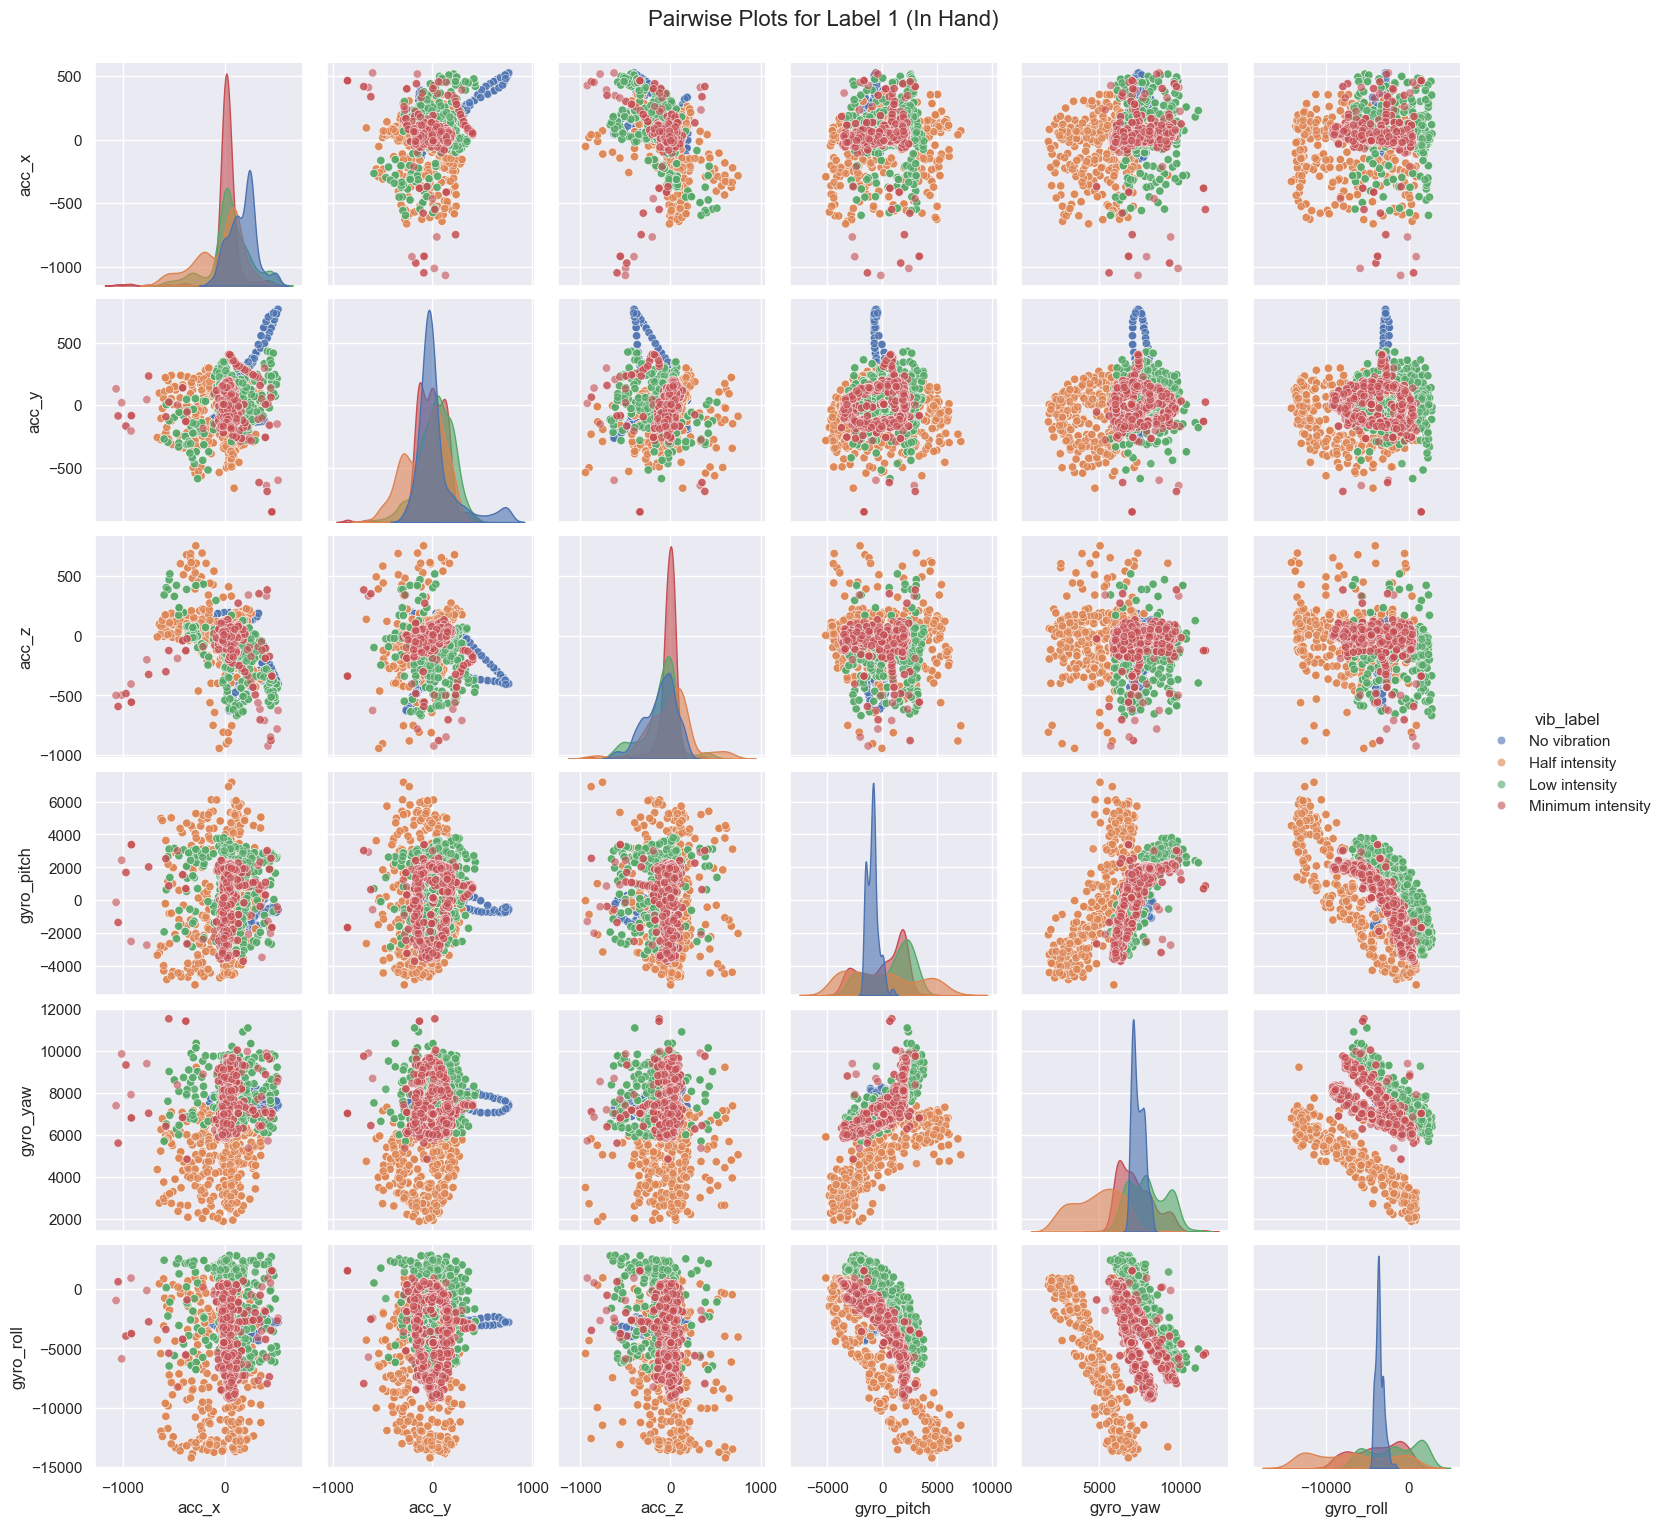

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the Seaborn theme and figure size
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = [15, 15]

# Vibration pattern labels
vib_pattern = {0: "No vibration", 1: "Half intensity", 2: "Full intensity", 
               3: "1hz sin wave", 4: "Low intensity", 8: "Minimum intensity"}

# Example data structure for reference
# Ensure `data` is a DataFrame with the required columns
# data = pd.read_csv('your_data.csv')  # Uncomment and load your data

# Select only the sensor data columns and add condition
sensor_cols = ['acc_x', 'acc_y', 'acc_z', 'gyro_pitch', 'gyro_yaw', 'gyro_roll']
data['condition'] = data.apply(lambda x: f'L{x.label}_V{x.vibration_status}', axis=1)

# Create pairwise plots for each label with vibration patterns in different colors
for label in [0, 1]:  # For each label (on table/in hand)
    label_data = data[data['label'] == label]
    
    if not label_data.empty:
        # Sample data to prevent overcrowding
        sampled_data = label_data.copy()
        sampled_data = sampled_data.groupby('vibration_status').apply(
            lambda x: x.sample(n=min(1000, len(x)))
        ).reset_index(drop=True)
        
        # Assign vibration pattern labels as a column for hue
        sampled_data['vib_label'] = sampled_data['vibration_status'].map(vib_pattern)
        
        # Create pairwise plot
        sns.pairplot(sampled_data, 
                     vars=sensor_cols, 
                     hue='vib_label',  # Use vibration pattern for color encoding
                     diag_kind='kde', 
                     plot_kws={'alpha': 0.6},
                     diag_kws={'alpha': 0.6})
        
        plt.suptitle(f'Pairwise Plots for Label {label} ({"In Hand" if label == 1 else "On Table"})', 
                     y=1.02, size=16)
        plt.show()


#### 1.4.2 UMAP

/opt/miniconda3/envs/dualsense/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/dualsense/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


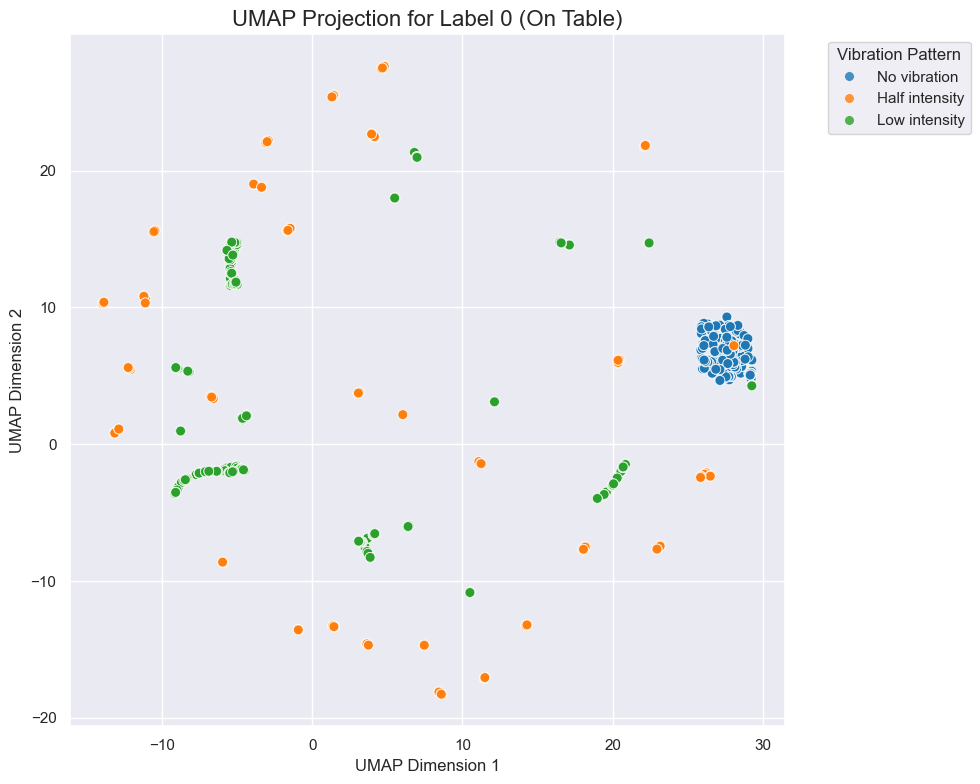

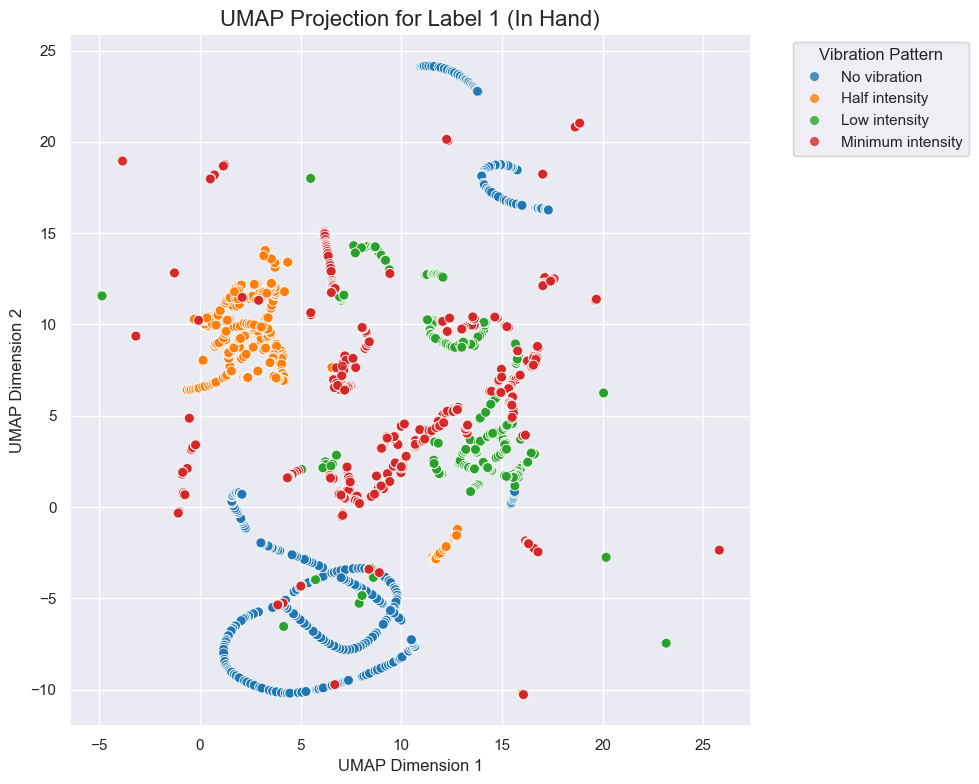

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import umap.umap_ as umap  # UMAP implementation
from sklearn.preprocessing import StandardScaler

# Set the Seaborn theme and figure size
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = [10, 8]

# Vibration pattern labels
vib_pattern = {0: "No vibration", 1: "Half intensity", 2: "Full intensity", 
               3: "1hz sin wave", 4: "Low intensity", 8: "Minimum intensity"}

# Example data structure for reference
# Ensure `data` is a DataFrame with the required columns
# data = pd.read_csv('your_data.csv')  # Uncomment and load your data

# Select only the sensor data columns
sensor_cols = ['acc_x', 'acc_y', 'acc_z', 'gyro_pitch', 'gyro_yaw', 'gyro_roll']

# Standardize the sensor data for UMAP
scaler = StandardScaler()
data[sensor_cols] = scaler.fit_transform(data[sensor_cols])

# Add a human-readable vibration label column
data['vib_label'] = data['vibration_status'].map(vib_pattern)

# UMAP dimensionality reduction
reducer = umap.UMAP(n_neighbors=100, min_dist=0.1, n_components=2, random_state=42)
umap_embedding = reducer.fit_transform(data[sensor_cols])

# Add UMAP results to the DataFrame
data['umap_x'] = umap_embedding[:, 0]
data['umap_y'] = umap_embedding[:, 1]

# Plot UMAP for each label
for label in [0, 1]:  # For each label (on table/in hand)
    label_data = data[data['label'] == label]
    
    if not label_data.empty:
        plt.figure(figsize=(10, 8))
        sns.scatterplot(
            x='umap_x', y='umap_y', hue='vib_label', 
            data=label_data, palette='tab10', s=50, alpha=0.8
        )
        plt.title(f'UMAP Projection for Label {label} ({"In Hand" if label == 1 else "On Table"})', size=16)
        plt.xlabel('UMAP Dimension 1')
        plt.ylabel('UMAP Dimension 2')
        plt.legend(title="Vibration Pattern", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


/opt/miniconda3/envs/dualsense/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/dualsense/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/miniconda3/envs/dualsense/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/dualsense/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


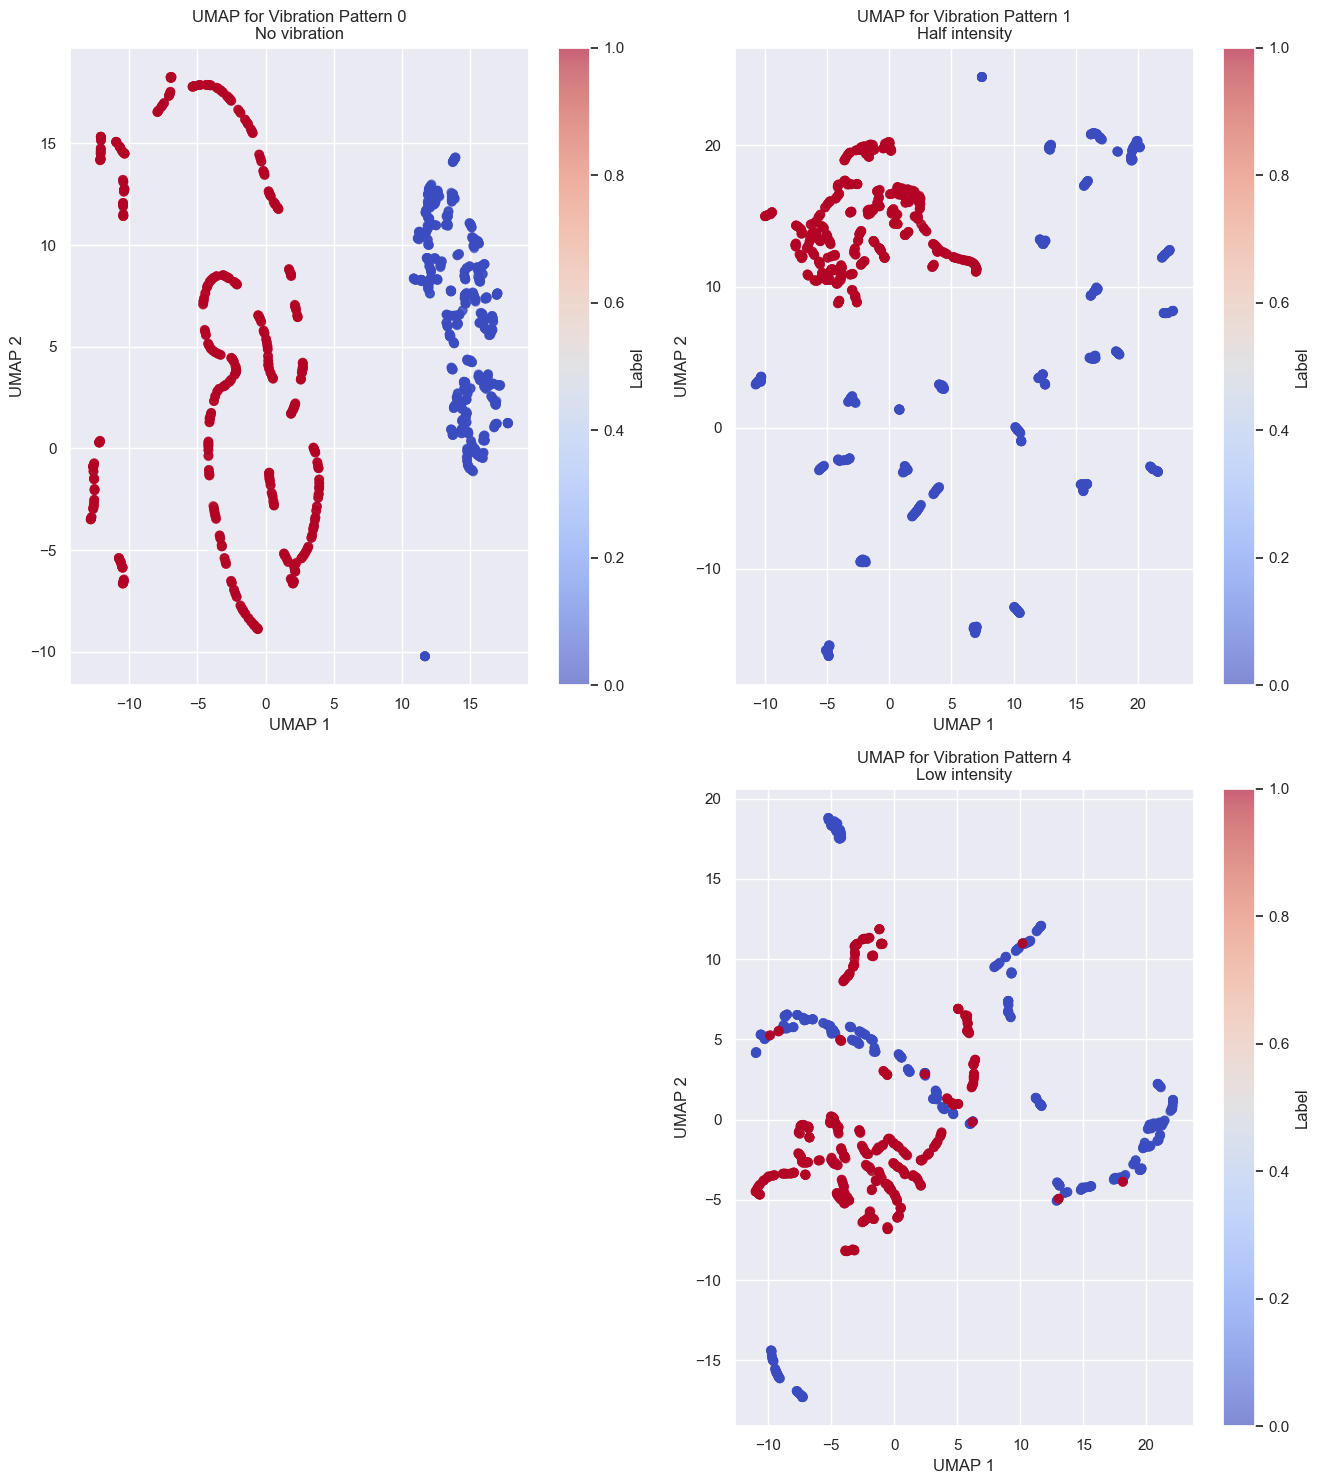

In [8]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Example data structure for reference
# data = pd.read_csv('your_data.csv')  # Load your dataset if needed

# Define vibration patterns
vib_pattern = {0: "No vibration", 1: "Half intensity", 2: "Full intensity", 
               3: "1hz sin wave", 4: "Low intensity", 8: "Minimum intensity"}

# Select only the sensor data columns
sensor_cols = ['acc_x', 'acc_y', 'acc_z', 'gyro_pitch', 'gyro_yaw', 'gyro_roll']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[sensor_cols])

# Create a UMAP model
umap_model = umap.UMAP(n_neighbors=100, min_dist=0.1, n_components=2, random_state=42)

# Set up the plot
plt.figure(figsize=(20, 15))

# Loop over vibration patterns and plot the UMAP for each
for vib in [0, 1, 2, 3, 4]:
    # Filter the data for the current vibration pattern
    condition_data = data[data['vibration_status'] == vib]
    
    if len(condition_data) > 0:  # Ensure there is data for this vibration pattern
        # Get the sensor data and labels for UMAP
        umap_data = scaler.fit_transform(condition_data[sensor_cols])
        labels = condition_data['label']  # Use label for coloring
        
        # Apply UMAP dimensionality reduction
        umap_result = umap_model.fit_transform(umap_data)
        
        # Create a subplot for each vibration pattern
        plt.subplot(2, 3, vib+1)  # 2 rows, 3 columns for subplots
        
        # Plot the UMAP result with colors based on the label
        scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=labels, cmap='coolwarm', alpha=0.6)
        plt.title(f'UMAP for Vibration Pattern {vib}\n{vib_pattern[vib]}')
        plt.xlabel('UMAP 1')
        plt.ylabel('UMAP 2')
        plt.colorbar(scatter, label='Label')
        
# Adjust layout
plt.tight_layout()
plt.show()


## 2 Data classification and model training

#### 2.1 SVM  - Binary classification with different vibration status

Key attributes:
- Label 0: On table
- Label 1: In hand
- Vibration status 0: No vibration
- Vibration status 1: Vibration type 1, half intensity, 128 intensity
- Vibration status 2: Vibration type 2, full intensity, 255 intensity
- Vibration status 3: Vibration type 3, 1hz sin wave, 0 to 255 intensity
- Vibration status 4: Vibration type 4, low intensity, 10 intensity
- Vibration status 8: Vibration type 8, minimum intensity, 1 intensity 


Collection rule:
- 1000 rows per vibration status and label
- 1ms polling interval

Model training: 
- SVM model
- windows size(session size) for each label and vibration status: 10 rows for each sample 
- No vib : 100 samples for label 0 vib 0 , 100 samples for label 1 vib 0   
- Low intensity : 100 samples for label 0 vib 4 , 100 samples for label 1 vib 4    

In [26]:
import pandas as pd

csv_file_name="inertial_data_rule1.csv"
data=pd.read_csv(csv_file_name)

windows_size=10 # integrate 10 rows for each sample for svm model






Processing vibration status 0

Processing vibration status 0
Total rows: 2000, Labels: [0 1]


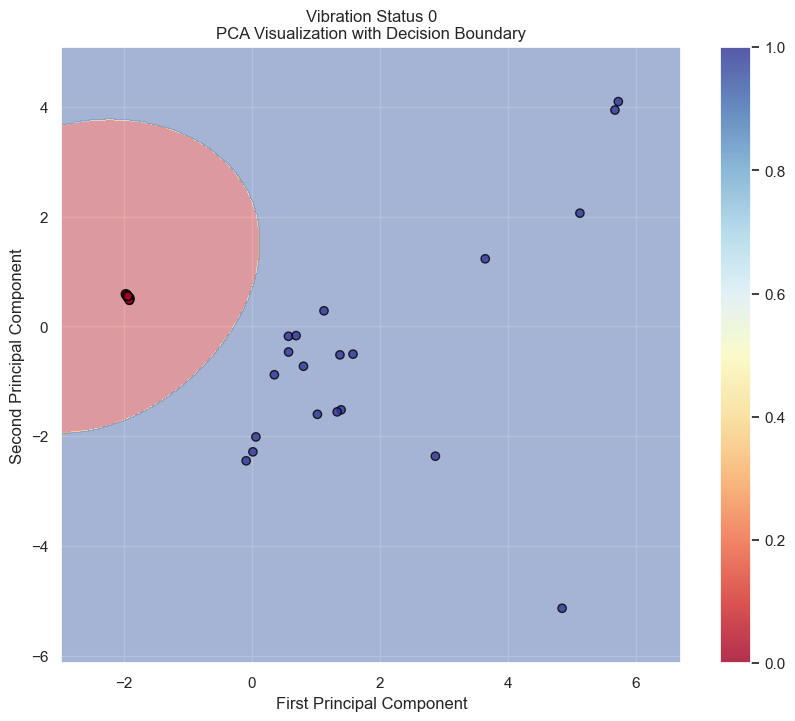


Processing vibration status 1

Processing vibration status 1
Total rows: 2000, Labels: [0 1]


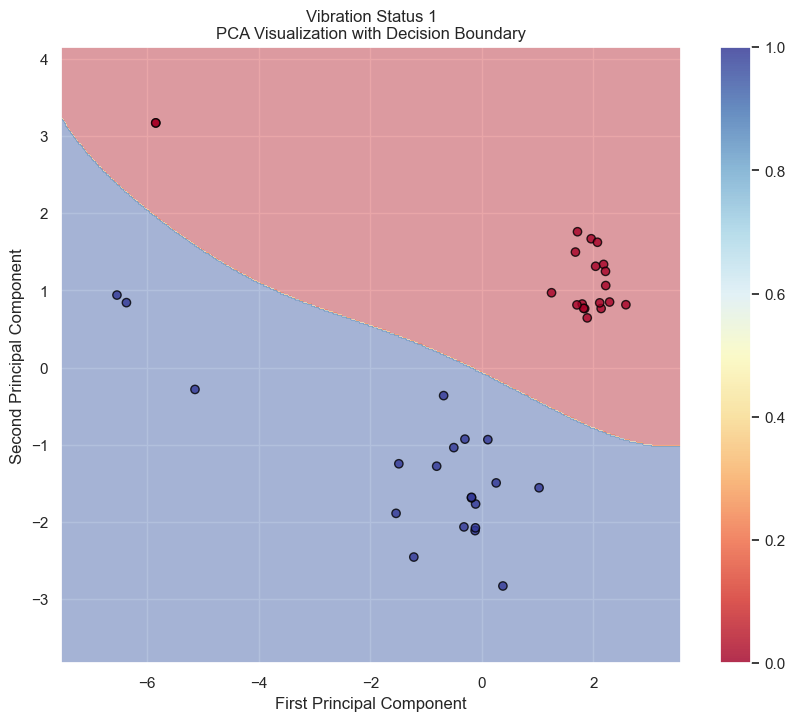


Processing vibration status 2

Processing vibration status 2
Total rows: 0, Labels: []
Skipping vibration status 2 - insufficient data

Processing vibration status 3

Processing vibration status 3
Total rows: 0, Labels: []
Skipping vibration status 3 - insufficient data

Processing vibration status 4

Processing vibration status 4
Total rows: 2000, Labels: [0 1]


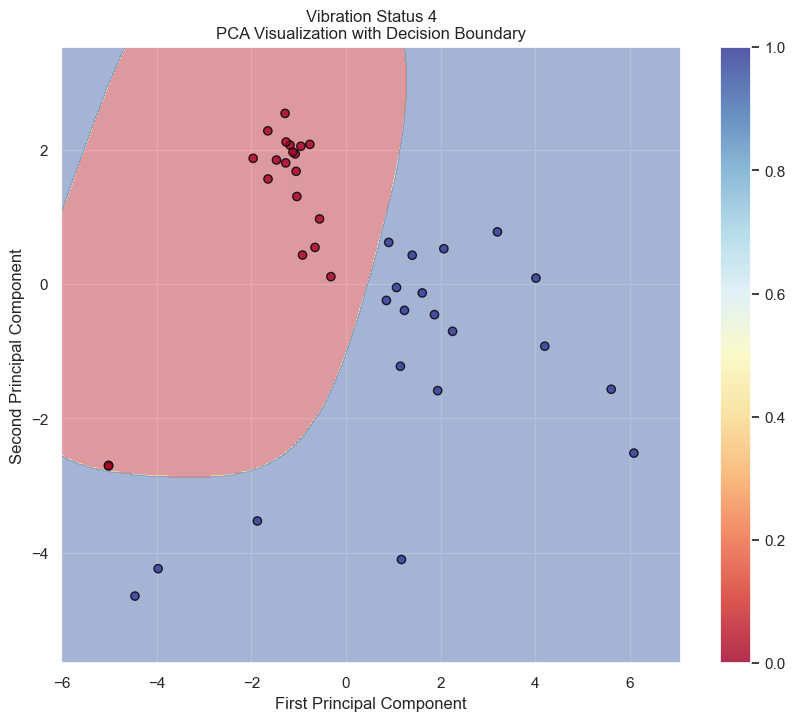

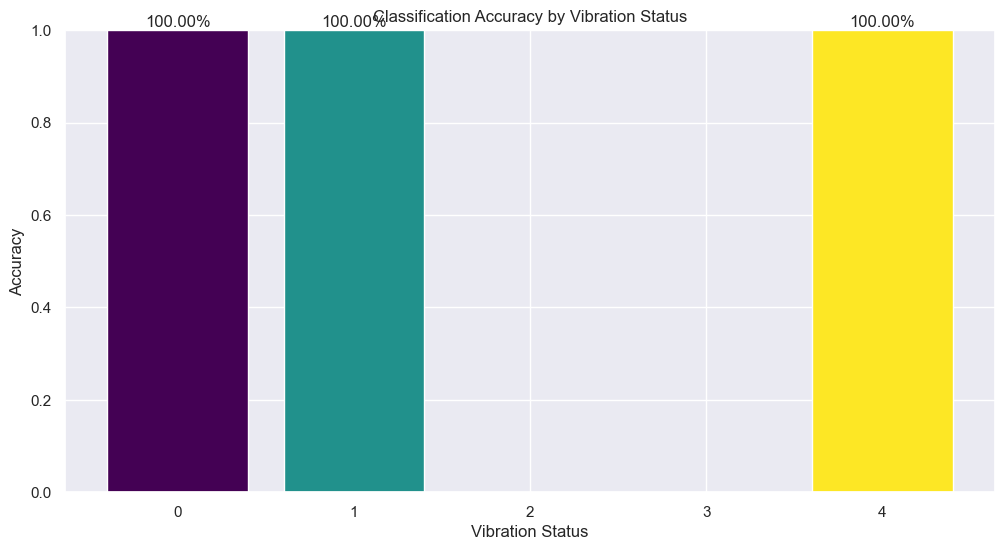

In [28]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def create_sliding_windows(data, vibration_status, window_size=10):
    """Create sliding windows from the data for a given vibration status."""
    data_vibration = data[data['vibration_status'] == vibration_status].copy()
    
    print(f"\nProcessing vibration status {vibration_status}")
    print(f"Total rows: {len(data_vibration)}, Labels: {data_vibration['label'].unique()}")
    
    if len(data_vibration) < window_size:
        return np.array([]), np.array([])
    
    windowed_data = []
    windowed_labels = []
    
    for label in [0, 1]:
        label_data = data_vibration[data_vibration['label'] == label]
        for i in range(0, len(label_data) - window_size + 1, window_size):
            window = label_data.iloc[i:i+window_size][sensor_cols]
            features = []
            for col in sensor_cols:
                features.extend([window[col].mean(), window[col].std()])
            windowed_data.append(features)
            windowed_labels.append(label)
    
    return np.array(windowed_data), np.array(windowed_labels)




def plot_decision_boundary(X, y, model, title):
    """Plot decision boundary with PCA-transformed data."""
    # Apply PCA to reduce to 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Create mesh grid
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    
    # Transform mesh points and predict
    mesh_pca = np.c_[xx.ravel(), yy.ravel()]
    mesh_original = pca.inverse_transform(mesh_pca)
    Z = model.predict(mesh_original)
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    
    # Fixed: Changed edcolors to edgecolors
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                         c=y, 
                         cmap='RdYlBu',
                         alpha=0.8,
                         edgecolors='black')
    
    plt.colorbar(scatter)
    plt.title(f'{title}\nPCA Visualization with Decision Boundary')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

def evaluate_svm_by_vibration(data, vibration_statuses, window_size=10):
    """Evaluate SVM performance with simplified visualization."""
    results = {}
    
    for vib_status in vibration_statuses:
        print(f"\nProcessing vibration status {vib_status}")
        
        # Process data
        X, y = create_sliding_windows(data, vib_status, window_size)
        if len(X) == 0 or len(np.unique(y)) < 2:
            print(f"Skipping vibration status {vib_status} - insufficient data")
            continue
            
        # Split and scale data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train and evaluate
        model = svm.SVC(kernel='rbf', C=1.0, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        # Store results
        results[vib_status] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'report': classification_report(y_test, y_pred, output_dict=True),
            'model': model,
            'X_scaled': X_test_scaled,
            'y_true': y_test
        }
        
        # Plot decision boundary
        plot_decision_boundary(X_test_scaled, y_test, model, 
                             f'Vibration Status {vib_status}')
    
    if not results:
        print("No valid results to display")
        return None, None
    
    # Create summary visualization
    plt.figure(figsize=(12, 6))
    
    # Plot accuracy comparison
    accuracies = [results[v]['accuracy'] for v in results]
    vib_labels = list(results.keys())
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(vib_labels)))
    bars = plt.bar(vib_labels, accuracies, color=colors)
    plt.ylim(0, 1)
    plt.title('Classification Accuracy by Vibration Status')
    plt.xlabel('Vibration Status')
    plt.ylabel('Accuracy')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2%}',
                ha='center', va='bottom')
    
    plt.show()
    
    # Create summary table
    summary_data = []
    for vib in results:
        report = results[vib]['report']
        summary_data.append({
            'Vibration': vib,
            'Accuracy': results[vib]['accuracy'],
            'Precision (Table)': report['0']['precision'],
            'Recall (Table)': report['0']['recall'],
            'Precision (Hand)': report['1']['precision'],
            'Recall (Hand)': report['1']['recall']
        })
    
    summary_df = pd.DataFrame(summary_data).round(3)
    summary_df = summary_df.set_index('Vibration')
    
    # Display styled table
    styled_df = summary_df.style.background_gradient(cmap='RdYlBu')
    display(styled_df)
    
    return results, summary_df

# Run evaluation
vibration_statuses = [0, 1, 2, 3, 4]
results, summary = evaluate_svm_by_vibration(data, vibration_statuses, window_size=10)

### 2.2 SVM for the identification classification - Binary classification 

- vibration_status=8 and 0 for person identification 

In [9]:
import pandas as pd

data=pd.read_csv("inertial_data_rule1.csv")

# only filter the data vibration_status=8
data_vib_8=data[data['vibration_status']==8]

# print the count of person_id
print(f" status == 8   {data_vib_8['person_id'].value_counts()}")

data_0=data[data['vibration_status']==0]
data_vib_0_label_1 = data_0[data_0['label'] == 1] # data when user hold controller and no vib and have 3 person_id

print(f" status == 0   {data_vib_0_label_1['person_id'].value_counts()}")

windows_size=10 # integrate 10 rows for each sample for svm model



 status == 8   person_id
0    1000
1    1000
2    1000
Name: count, dtype: int64
 status == 0   person_id
0    1000
1    1000
2    1000
Name: count, dtype: int64


Processing person 0: 1000 samples
Processing person 1: 1000 samples
Processing person 2: 1000 samples
Model training time: 0.00 seconds

Person Identification Results:
Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



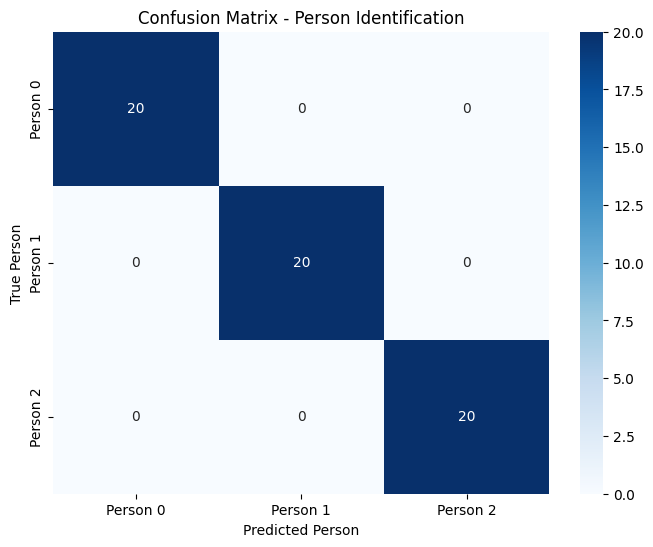

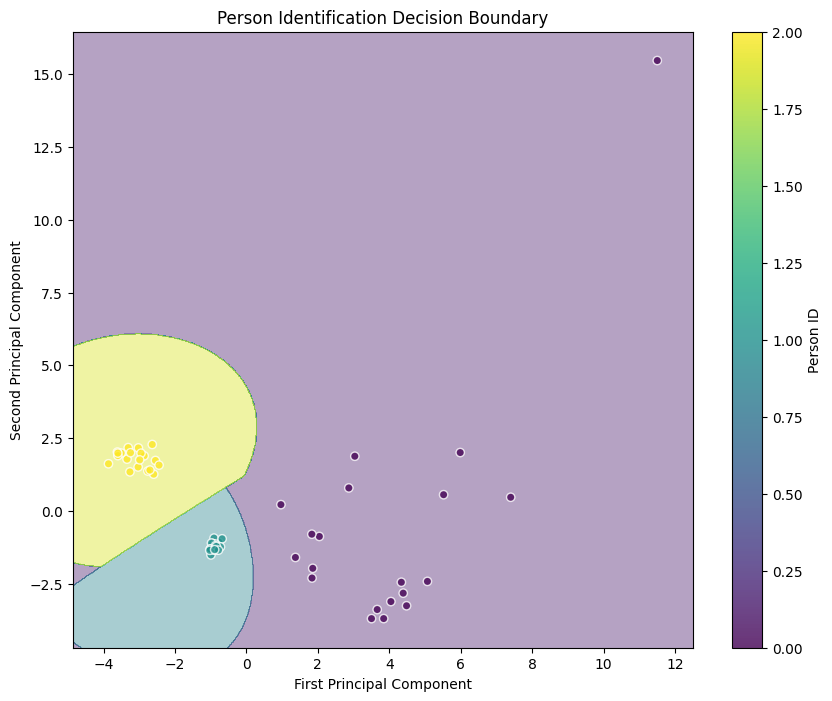

In [10]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import time  # Import time module

def create_person_windows(data, window_size=10):
    """Create sliding windows from the data for person identification."""
    sensor_cols = ['acc_x', 'acc_y', 'acc_z', 'gyro_pitch', 'gyro_yaw', 'gyro_roll']
    windowed_data = []
    person_labels = []

    for person in data['person_id'].unique():
        person_data = data[data['person_id'] == person]
        print(f"Processing person {person}: {len(person_data)} samples")

        # Create non-overlapping windows
        for i in range(0, len(person_data) - window_size + 1, window_size):
            window = person_data.iloc[i:i + window_size][sensor_cols]
            features = []
            for col in sensor_cols:
                # Calculate statistical features
                features.extend([
                    window[col].mean(),
                    window[col].std(),
                    window[col].min(),
                    window[col].max()
                ])
            windowed_data.append(features)
            person_labels.append(person)

    return np.array(windowed_data), np.array(person_labels)

def plot_person_decision_boundary(X, y, model, title):
    """Plot decision boundary with PCA-transformed data."""
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create mesh grid
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Transform mesh points and predict
    mesh_pca = np.c_[xx.ravel(), yy.ravel()]
    mesh_original = pca.inverse_transform(mesh_pca)
    Z = model.predict(mesh_original)
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

    # Scatter plot with different colors for each person
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                          c=y, 
                          cmap='viridis',
                          alpha=0.8,
                          edgecolors='white')

    plt.colorbar(scatter, label='Person ID')
    plt.title(title)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

def evaluate_person_identification(data_8, window_size=10):
    """Evaluate SVM performance for person identification."""
    # Create windows and labels
    X, y = create_person_windows(data_8, window_size)

    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train SVM model
    model = svm.SVC(kernel='rbf', C=1.0, random_state=42)
    start_time = time.time()  # Start timing
    model.fit(X_train_scaled, y_train)
    end_time = time.time()  # End timing

    training_time = end_time - start_time
    print(f"Model training time: {training_time:.2f} seconds")

    # Predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print results
    print("\nPerson Identification Results:")
    print(f"Accuracy: {accuracy:.3f}")
    print("\nClassification Report:")
    print(class_report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Person {i}' for i in range(len(np.unique(y)))],
                yticklabels=[f'Person {i}' for i in range(len(np.unique(y)))])
    plt.title('Confusion Matrix - Person Identification')
    plt.ylabel('True Person')
    plt.xlabel('Predicted Person')
    plt.show()

    # Plot decision boundary
    plot_person_decision_boundary(X_test_scaled, y_test, model, 
                                  'Person Identification Decision Boundary')

    return model, accuracy, conf_matrix, class_report

# Run the evaluation
model, accuracy, conf_matrix, class_report = evaluate_person_identification(data_vib_0_label_1, window_size=10)


In [ ]:
## save model and scale

import joblib


joblib.dump(model, 'person_identification_model.pkl')
joblib.dump(scaler, 'person_identification_scaler.pkl')

In [ ]:
# function to inference 
import pydualsense 

def inference(data,model, scaler, windows_size=10):



    pass



def get_data(dualsense:pydualsense.pyDualSense):

    pass